# EDA on 2016 data set for the Hack The Wind 2018

### Changing directory 

In [2]:
import os
os.chdir('D:\Education\Hackathon2018\pre2016')

### Ingesting data with Pandas 

In [50]:
import pandas as pd
pd.options.display.max_colwidth = 100
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
wind_signals= pd.read_csv('htw-wind-farm-1-signals-2016.csv', sep=';')
wind_errors= pd.read_csv('htw-failures-2016.csv', sep=';')
#wind_signals= pd.read_csv('D:\Education\Hackathon2018\2016\htw-wind-farm-1-signals-2016', sep=';')
#wind_signals.isnull().any()
wind_signals = wind_signals.interpolate() # interpolate to remove NA
windsign_imppar = ['Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg','Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg','Amb_WindSpeed_Max','Amb_WindSpeed_Avg','Amb_Temp_Avg','Prod_LatestAvg_TotActPwr','Prod_LatestAvg_TotReactPwr','HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg','HVTrafo_Phase3_Temp_Avg','Grd_InverterPhase1_Temp_Avg','Gen_SlipRing_Temp_Avg','Blds_PitchAngle_Max','Blds_PitchAngle_Avg','Grd_Prod_Pwr_Avg','Grd_Busbar_Temp_Avg','Gen_Bear2_Temp_Avg'] #Wind important par

## Functions

### Function to find the relevant columns for analysis

In [51]:
def fin_par(par,col):
    par_str = []
    for i in col:
        if par in i:
            par_str.append(i)
    return par_str

### Slicing function for the turbine data

In [52]:
def sli_turbine(Turbine,df):
    Tur_wind_signals =df[df['Turbine_ID'] == Turbine].sort_index(ascending=True)
    return Tur_wind_signals 

### Function to extract values between a given start and end time

In [53]:
def giv_time(df1,start_time,end_time):
    r_df1 = df1[(df1.index > start_time) & (df1.index <= end_time)]
    return r_df1

### Making the timestamp as index
   Converterd it to datetime format

In [54]:
wind_signals['Timestamp'] = pd.to_datetime(wind_signals['Timestamp'])
wind_signals.index = wind_signals['Timestamp']
del wind_signals['Timestamp']

In [58]:
T06 = sli_turbine('T06',wind_signals) #Fn used to slice relevant turbine data
T06 = T06[windsign_imppar]

# T06 turbine analysis

In [59]:
T06_errors = sli_turbine('T06',wind_errors)
T06_errors

Turbine_ID        Component            Timestamp  \
0         T06        GENERATOR  2016-09-04 08:08:00   
5         T06        GENERATOR  2016-07-11 19:48:00   
6         T06        GENERATOR  2016-10-27 16:26:00   
9         T06  HYDRAULIC_GROUP  2016-04-04 18:53:00   
13        T06        GENERATOR  2016-07-24 17:01:00   
14        T06        GENERATOR  2016-10-02 17:08:00   

                                                               Remarks  
0                                     High temperature generator error  
5                                                   Generator replaced  
6                                                   Generator replaced  
9                                            Error in pitch regulation  
13                                Generator temperature sensor failure  
14  Refrigeration system and temperature sensors in generator replaced

In [60]:
gen_par = fin_par('Gen',T06.columns) #Fn used to find the str and par for the analysis
gentemp_par = fin_par('Temp', gen_par) #
gentemp_par

['Gen_Bear_Temp_Avg',
 'Gen_Phase1_Temp_Avg',
 'Gen_Phase2_Temp_Avg',
 'Gen_Phase3_Temp_Avg',
 'Gen_SlipRing_Temp_Avg',
 'Gen_Bear2_Temp_Avg']

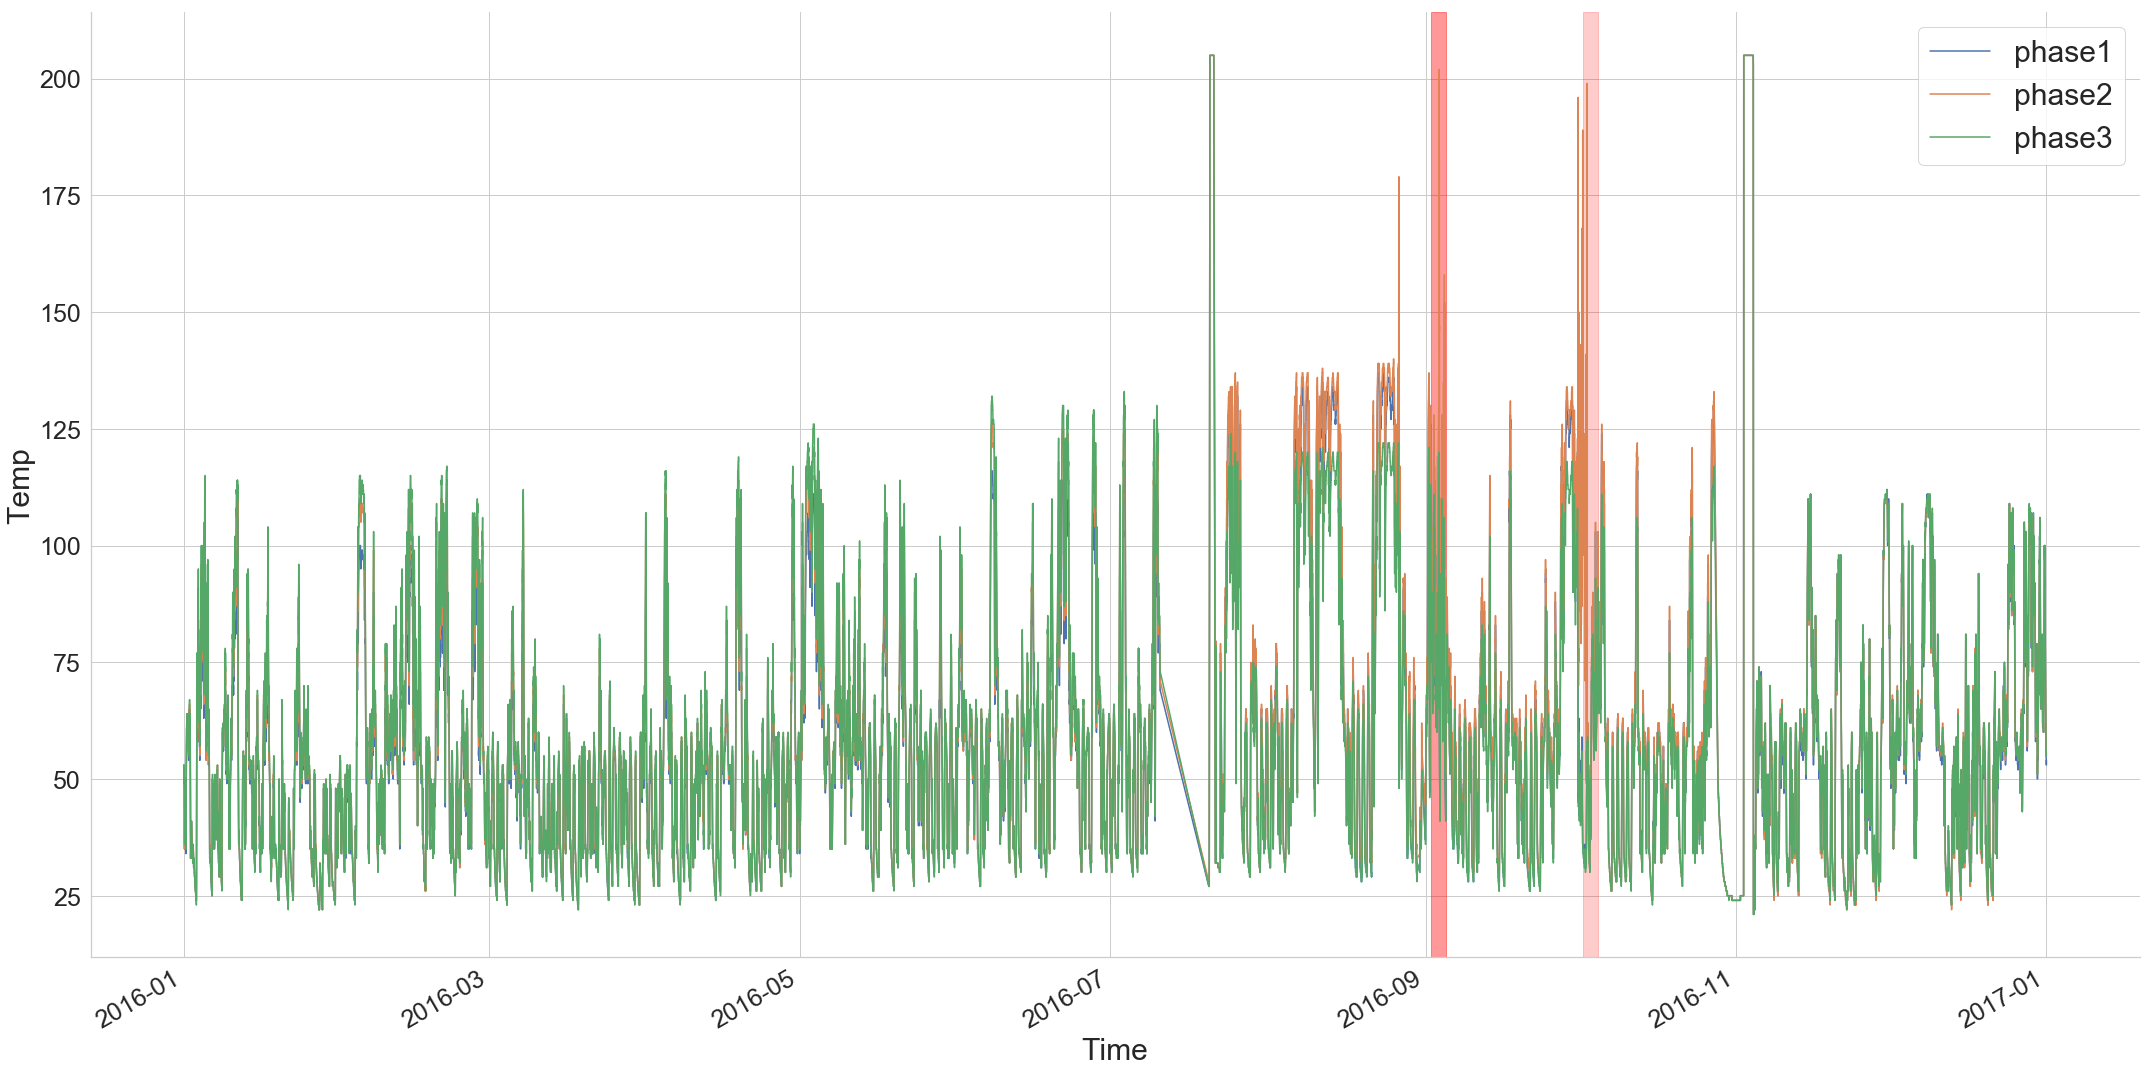

In [12]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
T06.Gen_Phase1_Temp_Avg.plot(label='phase1')
T06.Gen_Phase2_Temp_Avg.plot(label='phase2')
T06.Gen_Phase3_Temp_Avg.plot(label='phase3')
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Power (W)',fontsize=30)
plt.axvspan('2016-09-02 00:00:00','2016-09-04 23:00:00', color='red', alpha=0.4)
plt.axvspan('2016-10-02 00:00:00','2016-10-04 23:00:00', color='red', alpha=0.2) #2016-10-02
#axis.yaxis.set_tick_params(labelsize=15)
plt.legend(prop={'size': 30})
plt.tight_layout()
plt.ylabel("Temp")
sns.despine()

### Plotting the T06 generator temperatures around the area of failure
- Sudden increase in either of the phases leads to a temperature failure later
    - Should distinguish between sensor error and actual high temperature

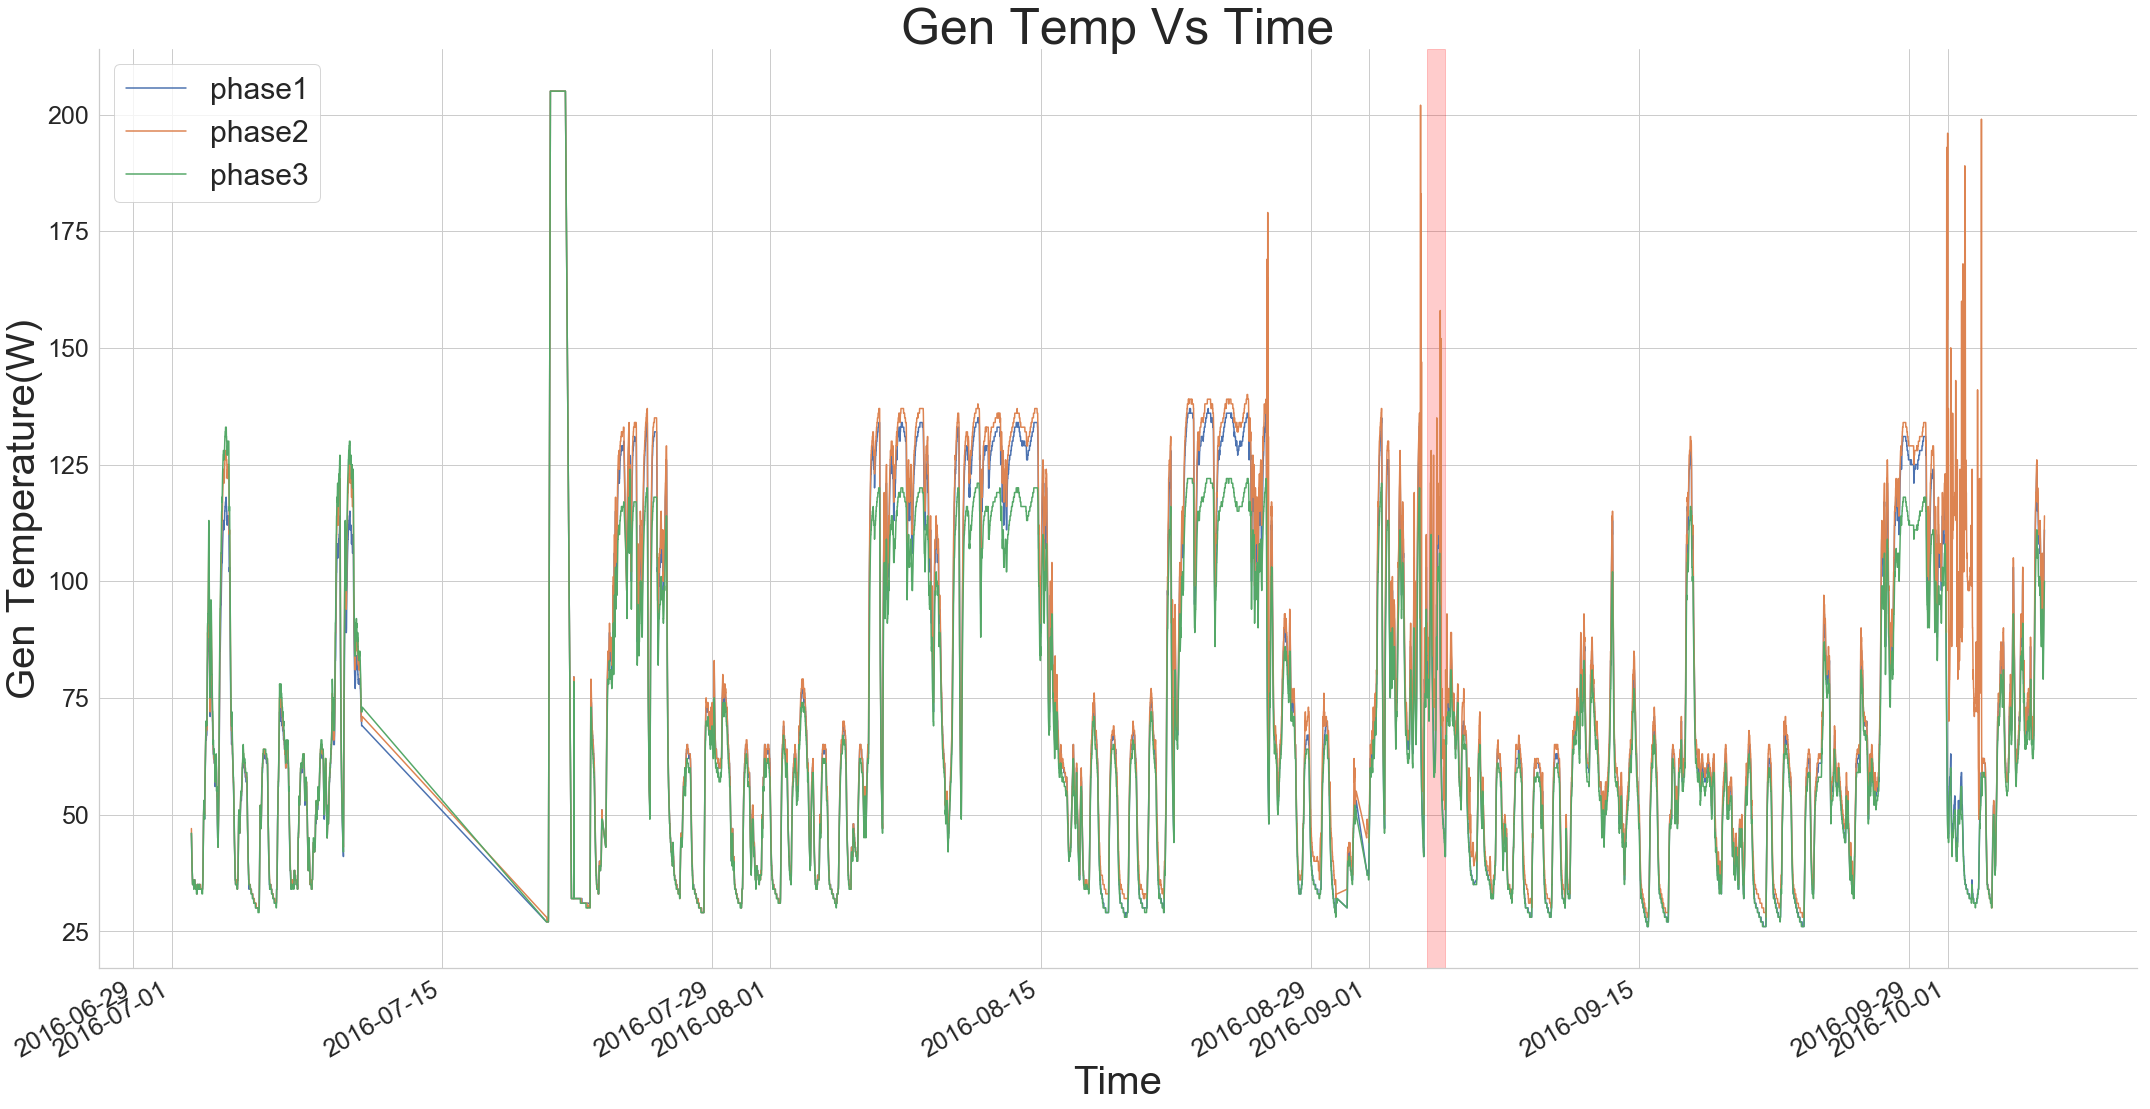

In [14]:
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
sns.set_style("whitegrid")
fig, axis = plt.subplots()
T06_temerr = giv_time(T06,'2016-07-02 00:00:00','2016-10-06 00:00:00') #Fn used to extract the values bt str & end
T06_temerr.Gen_Phase1_Temp_Avg.plot(label='phase1')
T06_temerr.Gen_Phase2_Temp_Avg.plot(label='phase2')
T06_temerr.Gen_Phase3_Temp_Avg.plot(label='phase3')
axis.set_xlabel('Time',fontsize=40)
axis.set_ylabel('Gen Temperature(W)',fontsize=40)
plt.legend(prop={'size': 30})
plt.tight_layout()
plt.title("Gen Temp Vs Time",fontsize=50)
sns.despine()
plt.axvspan('2016-09-04 00:00:00','2016-09-04 23:00:00', color='red', alpha=0.2)
#plt.axvspan('2016-08-21 00:00:00', '2016-08-23 00:00:00', color='red', alpha=0.5)
#2016-09-04 08:08:00

### Finding the correlation matrix with Gen phase 2 temp

In [62]:
corr_T06genphase2 = T06.corr()['Gen_Phase2_Temp_Avg'].sort_values()
corr_T06genphase2

Prod_LatestAvg_TotReactPwr    -0.780213
Blds_PitchAngle_Avg           -0.303896
Blds_PitchAngle_Max           -0.251320
Amb_Temp_Avg                   0.375986
Hyd_Oil_Temp_Avg               0.597342
Gen_RPM_Max                    0.644290
Nac_Temp_Avg                   0.693485
Gen_RPM_Min                    0.693749
Gear_Oil_Temp_Avg              0.749548
Amb_WindSpeed_Max              0.789873
Gen_SlipRing_Temp_Avg          0.791849
Gear_Bear_Temp_Avg             0.797154
Grd_InverterPhase1_Temp_Avg    0.823827
Amb_WindSpeed_Avg              0.828480
Grd_Prod_Pwr_Avg               0.849864
Prod_LatestAvg_TotActPwr       0.849875
Grd_Busbar_Temp_Avg            0.860895
HVTrafo_Phase1_Temp_Avg        0.861946
HVTrafo_Phase2_Temp_Avg        0.864213
HVTrafo_Phase3_Temp_Avg        0.877640
Gen_Bear2_Temp_Avg             0.906695
Gen_Bear_Temp_Avg              0.939772
Gen_Phase3_Temp_Avg            0.971162
Gen_Phase1_Temp_Avg            0.980828
Gen_Phase2_Temp_Avg            1.000000


In [15]:
pitch_par = fin_par('Pitch',T06.columns)
hyd_par = fin_par('Hyd',T06.columns)
print(hyd_par) 
pitch_par

['Hyd_Oil_Temp_Avg']


['Blds_PitchAngle_Min',
 'Blds_PitchAngle_Max',
 'Blds_PitchAngle_Avg',
 'Blds_PitchAngle_Std']

In [16]:
T06[pitch_par].describe() 

Blds_PitchAngle_Min  Blds_PitchAngle_Max  Blds_PitchAngle_Avg  \
count         50579.000000         50579.000000         50579.000000   
mean              7.540891            14.730715            10.248543   
std              18.127545            20.743358            18.230517   
min              -3.300000            -2.200000            -2.300000   
25%              -2.400000             0.300000            -1.600000   
50%              -2.100000             5.500000             0.200000   
75%              21.200000            24.000000            24.000000   
max              90.000000            90.000000            90.000000   

       Blds_PitchAngle_Std  
count         50579.000000  
mean              1.677262  
std               4.158200  
min               0.000000  
25%               0.100000  
50%               0.400000  
75%               0.900000  
max              45.000000

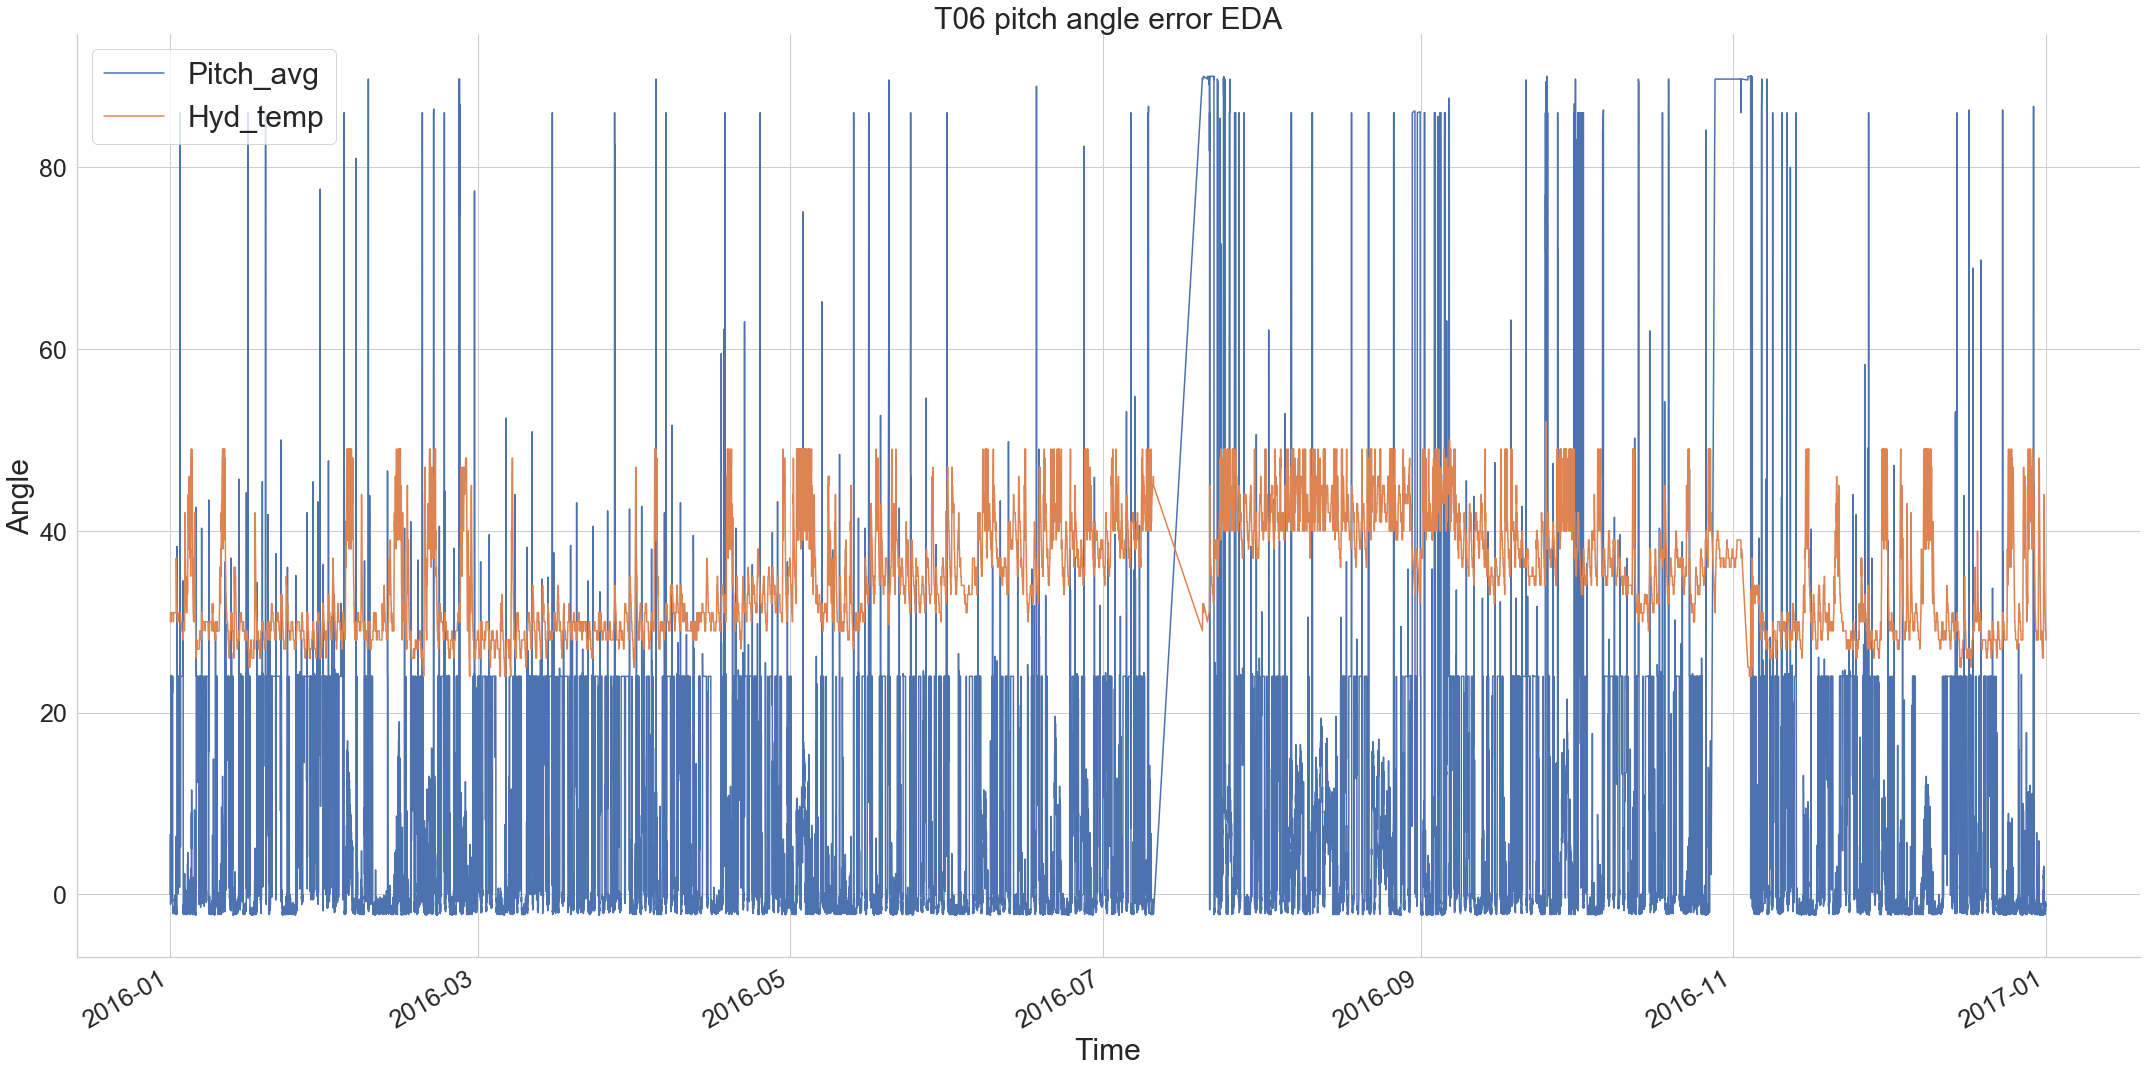

In [17]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
T06.Blds_PitchAngle_Avg.plot(label='Pitch_avg')
T06.Hyd_Oil_Temp_Avg.plot(label='Hyd_temp')
#T06.Blds_PitchAngle_Max.plot(label='Pitch_max')
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Angle',fontsize=30)
#axis.yaxis.set_tick_params(labelsize=15)
plt.title("T06 pitch angle error EDA",size=30)
plt.legend(prop={'size':30})
plt.tight_layout()
sns.despine()

### Pitch angle around the area of errors
- Pitch angle and hydraulics temperature are good indicators of failure
    - Whenever both reaches high values together, there are high chances of failure 
    - Ambient wind speed maximum is also an eligible feature for fault detection

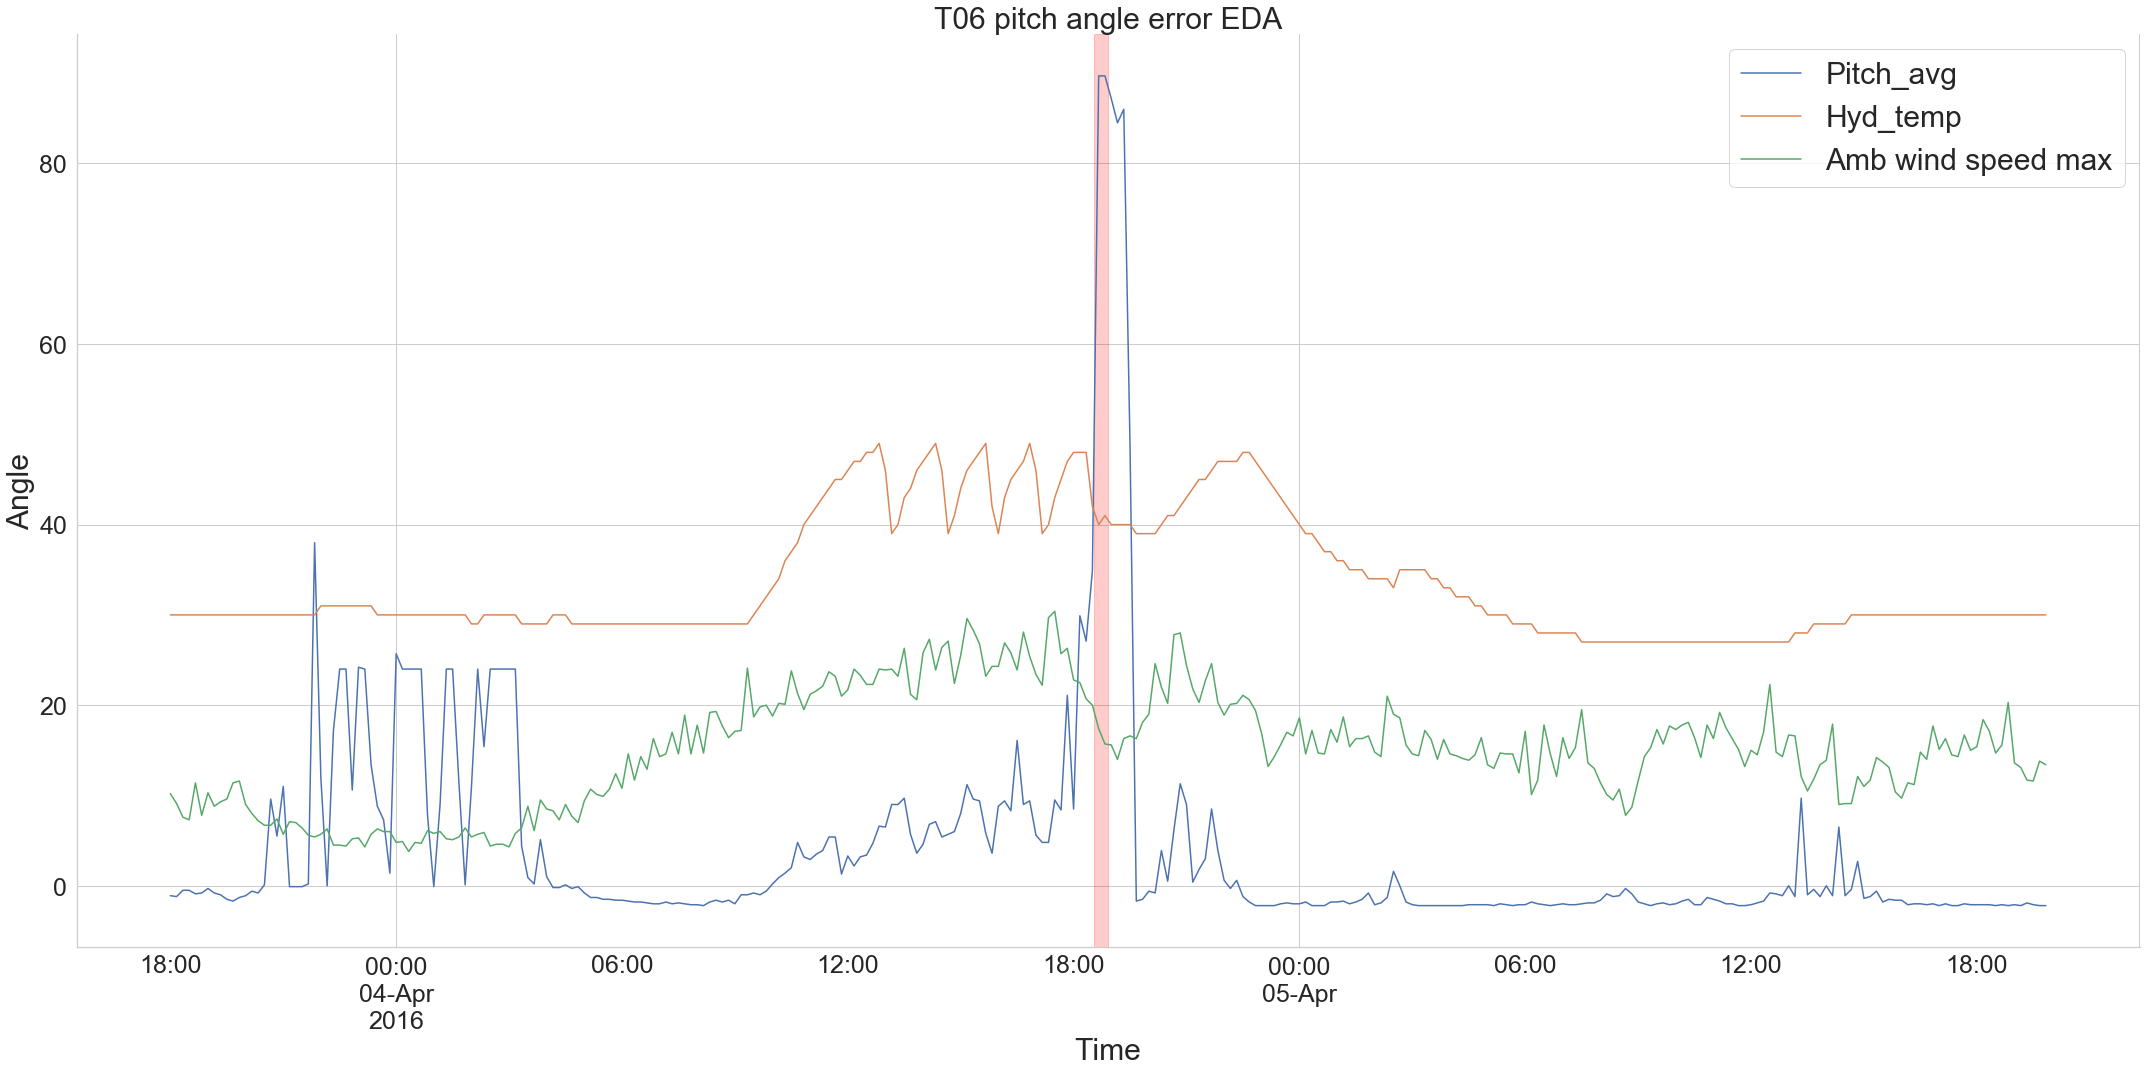

In [42]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
T06_pitcherr = giv_time(T06,'2016-04-03 17:53:00','2016-04-05 19:53:00') # Actual err on  2016-04-04 18:53:00 / '2016-02-03 00:00:00','2016-04-08 00:00:00'
T06_pitcherr.Blds_PitchAngle_Avg.plot(label='Pitch_avg')
T06_pitcherr.Hyd_Oil_Temp_Avg .plot(label='Hyd_temp') #Hyd_Oil_Temp_Avg 
T06_pitcherr.Amb_WindSpeed_Max.plot(label='Amb wind speed max') 
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Angle',fontsize=30)
#axis.yaxis.set_tick_params(labelsize=15)
plt.axvspan('2016-04-04 18:33:00',' 2016-04-04 18:55:00', color='red', alpha=0.2)
#plt.axvspan('2016-02-21 00:00:00',' 2016-02-22 00:00:00', color='red', alpha=0.2)
plt.title("T06 pitch angle error EDA",size=30)
plt.legend(prop={'size':30})
plt.tight_layout()
sns.despine()

### Finding correlation matrix between pitch avg

In [63]:
corr_T06pitchangle = T06.corr()['Blds_PitchAngle_Avg'].sort_values()
corr_T06pitchangle

Gen_RPM_Max                   -0.742908
Gen_RPM_Min                   -0.723030
Gear_Bear_Temp_Avg            -0.644395
Gear_Oil_Temp_Avg             -0.585448
Grd_InverterPhase1_Temp_Avg   -0.443845
Grd_Busbar_Temp_Avg           -0.407802
Grd_Prod_Pwr_Avg              -0.363880
Prod_LatestAvg_TotActPwr      -0.363576
Gen_Phase3_Temp_Avg           -0.354863
Gen_Phase1_Temp_Avg           -0.331597
HVTrafo_Phase1_Temp_Avg       -0.318882
HVTrafo_Phase2_Temp_Avg       -0.315187
HVTrafo_Phase3_Temp_Avg       -0.312930
Gen_Phase2_Temp_Avg           -0.303896
Gen_Bear_Temp_Avg             -0.277540
Amb_WindSpeed_Max             -0.267984
Amb_WindSpeed_Avg             -0.237037
Gen_Bear2_Temp_Avg            -0.214270
Gen_SlipRing_Temp_Avg         -0.167903
Nac_Temp_Avg                  -0.151854
Hyd_Oil_Temp_Avg              -0.043227
Amb_Temp_Avg                   0.010503
Prod_LatestAvg_TotReactPwr     0.560211
Blds_PitchAngle_Max            0.867951
Blds_PitchAngle_Avg            1.000000


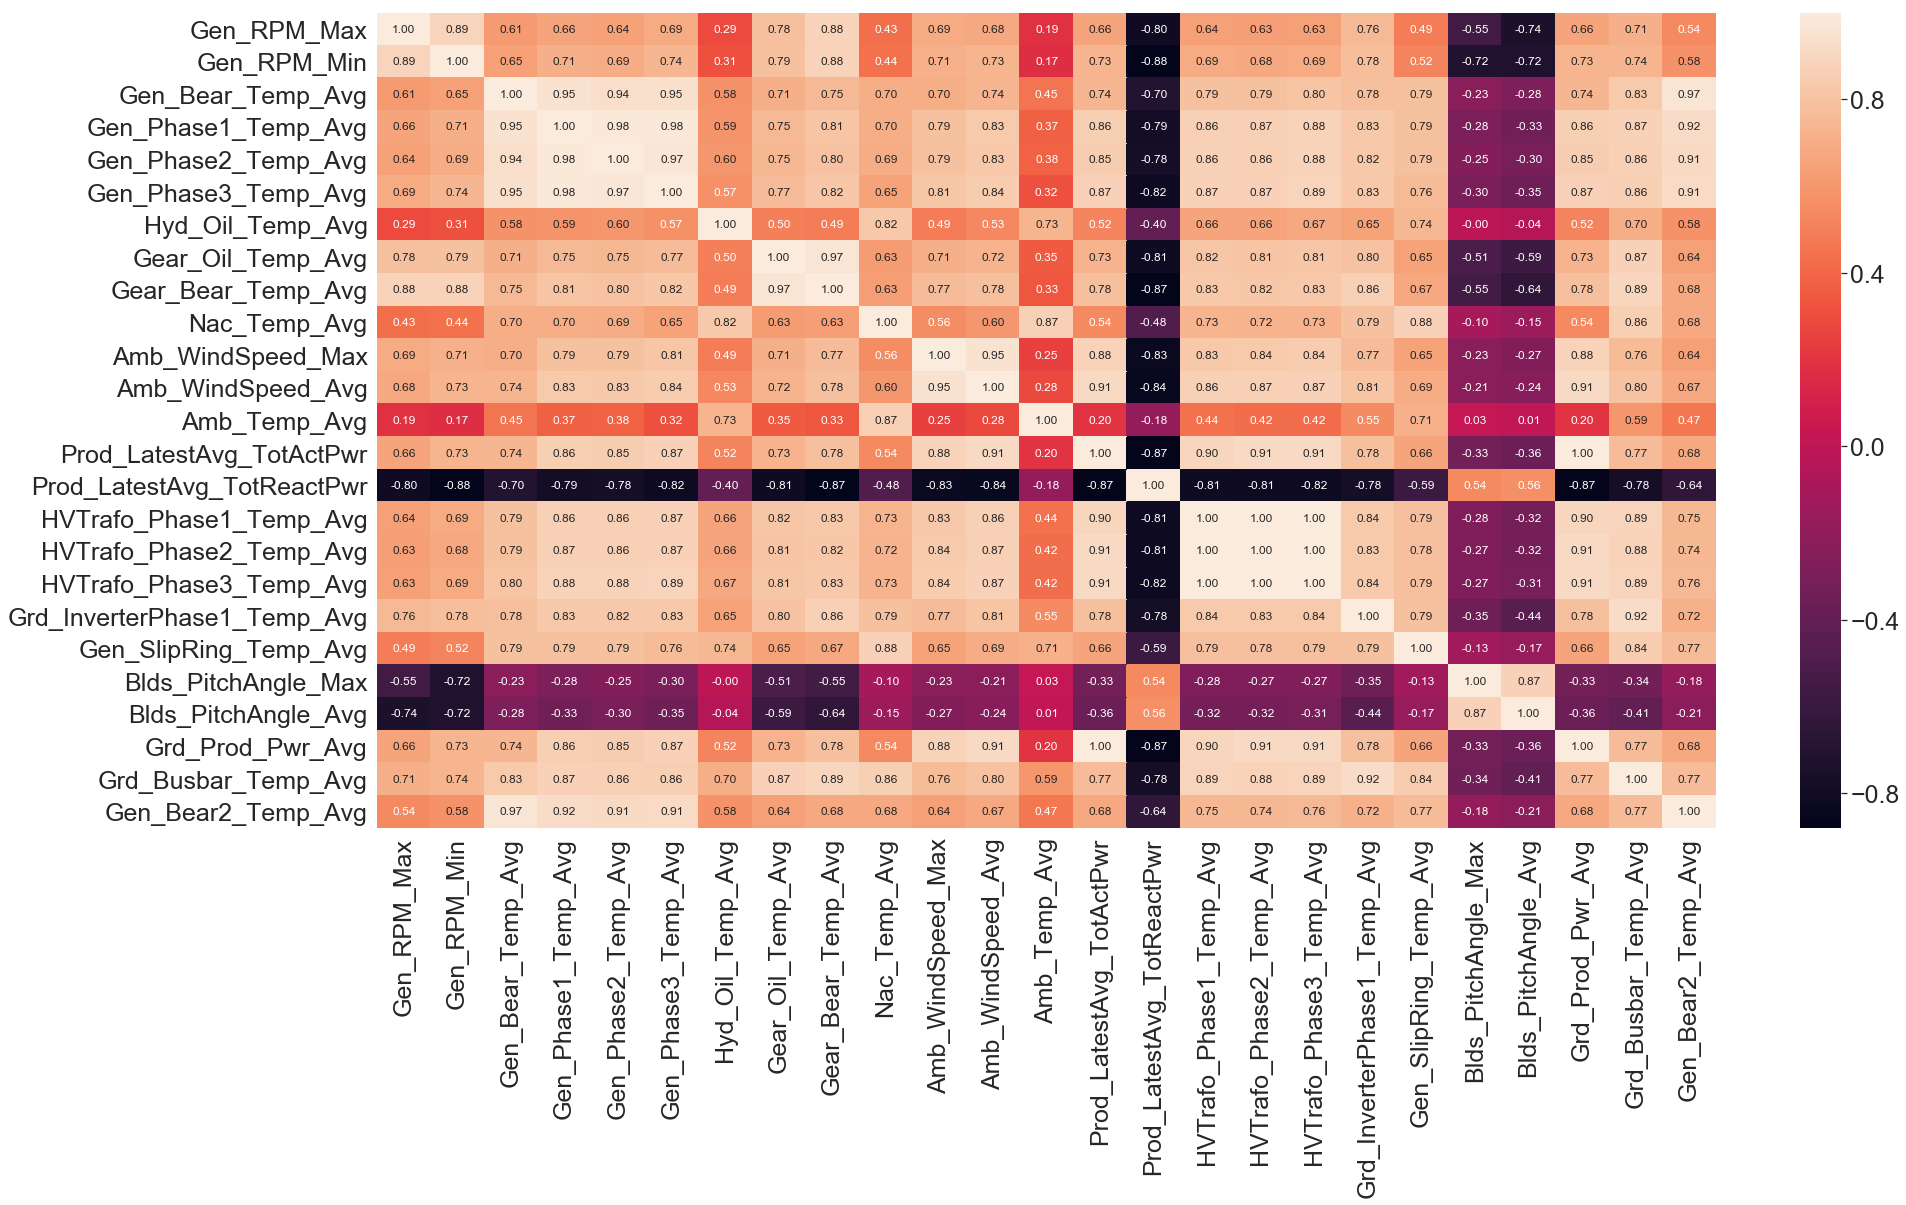

In [70]:
sns.heatmap(T06.corr(), annot=True, fmt=".2f")

## T07 analysis  

In [64]:
T07 = sli_turbine('T07',wind_signals)
T07 = T07[windsign_imppar]

In [65]:
T07_errors = sli_turbine('T07',wind_errors)
T07_errors.sort_values('Timestamp')

Turbine_ID          Component            Timestamp  \
1         T07  GENERATOR_BEARING  2016-04-30 12:40:00   
10        T07        TRANSFORMER  2016-07-10 03:46:00   
7         T07        TRANSFORMER  2016-08-23 02:21:00   

                                                             Remarks  
1            High temperature in generator bearing (replaced sensor)  
10                                      High temperature transformer  
7   High temperature transformer. Transformer refrigeration repaired

In [21]:
T07_trafopar = fin_par('Trafo',T07.columns)
T07_pwrpar = fin_par('Pwr',T07.columns)
T07_bearpar = fin_par('Bear',T07.columns)
#T07_trafopar
T07_bearpar

['Gen_Bear_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Gen_Bear2_Temp_Avg']

In [22]:
T07[T07_trafopar].describe()

HVTrafo_Phase1_Temp_Avg  HVTrafo_Phase2_Temp_Avg  \
count             52446.000000             52446.000000   
mean                 68.727453                76.182197   
std                  10.656684                12.368416   
min                  42.000000                46.500000   
25%                  61.000000                68.000000   
50%                  67.000000                72.000000   
75%                  74.000000                81.000000   
max                 104.000000               118.000000   

       HVTrafo_Phase3_Temp_Avg  
count             52446.000000  
mean                 83.257493  
std                  14.571988  
min                  42.500000  
25%                  72.000000  
50%                  80.000000  
75%                  92.000000  
max                 137.000000

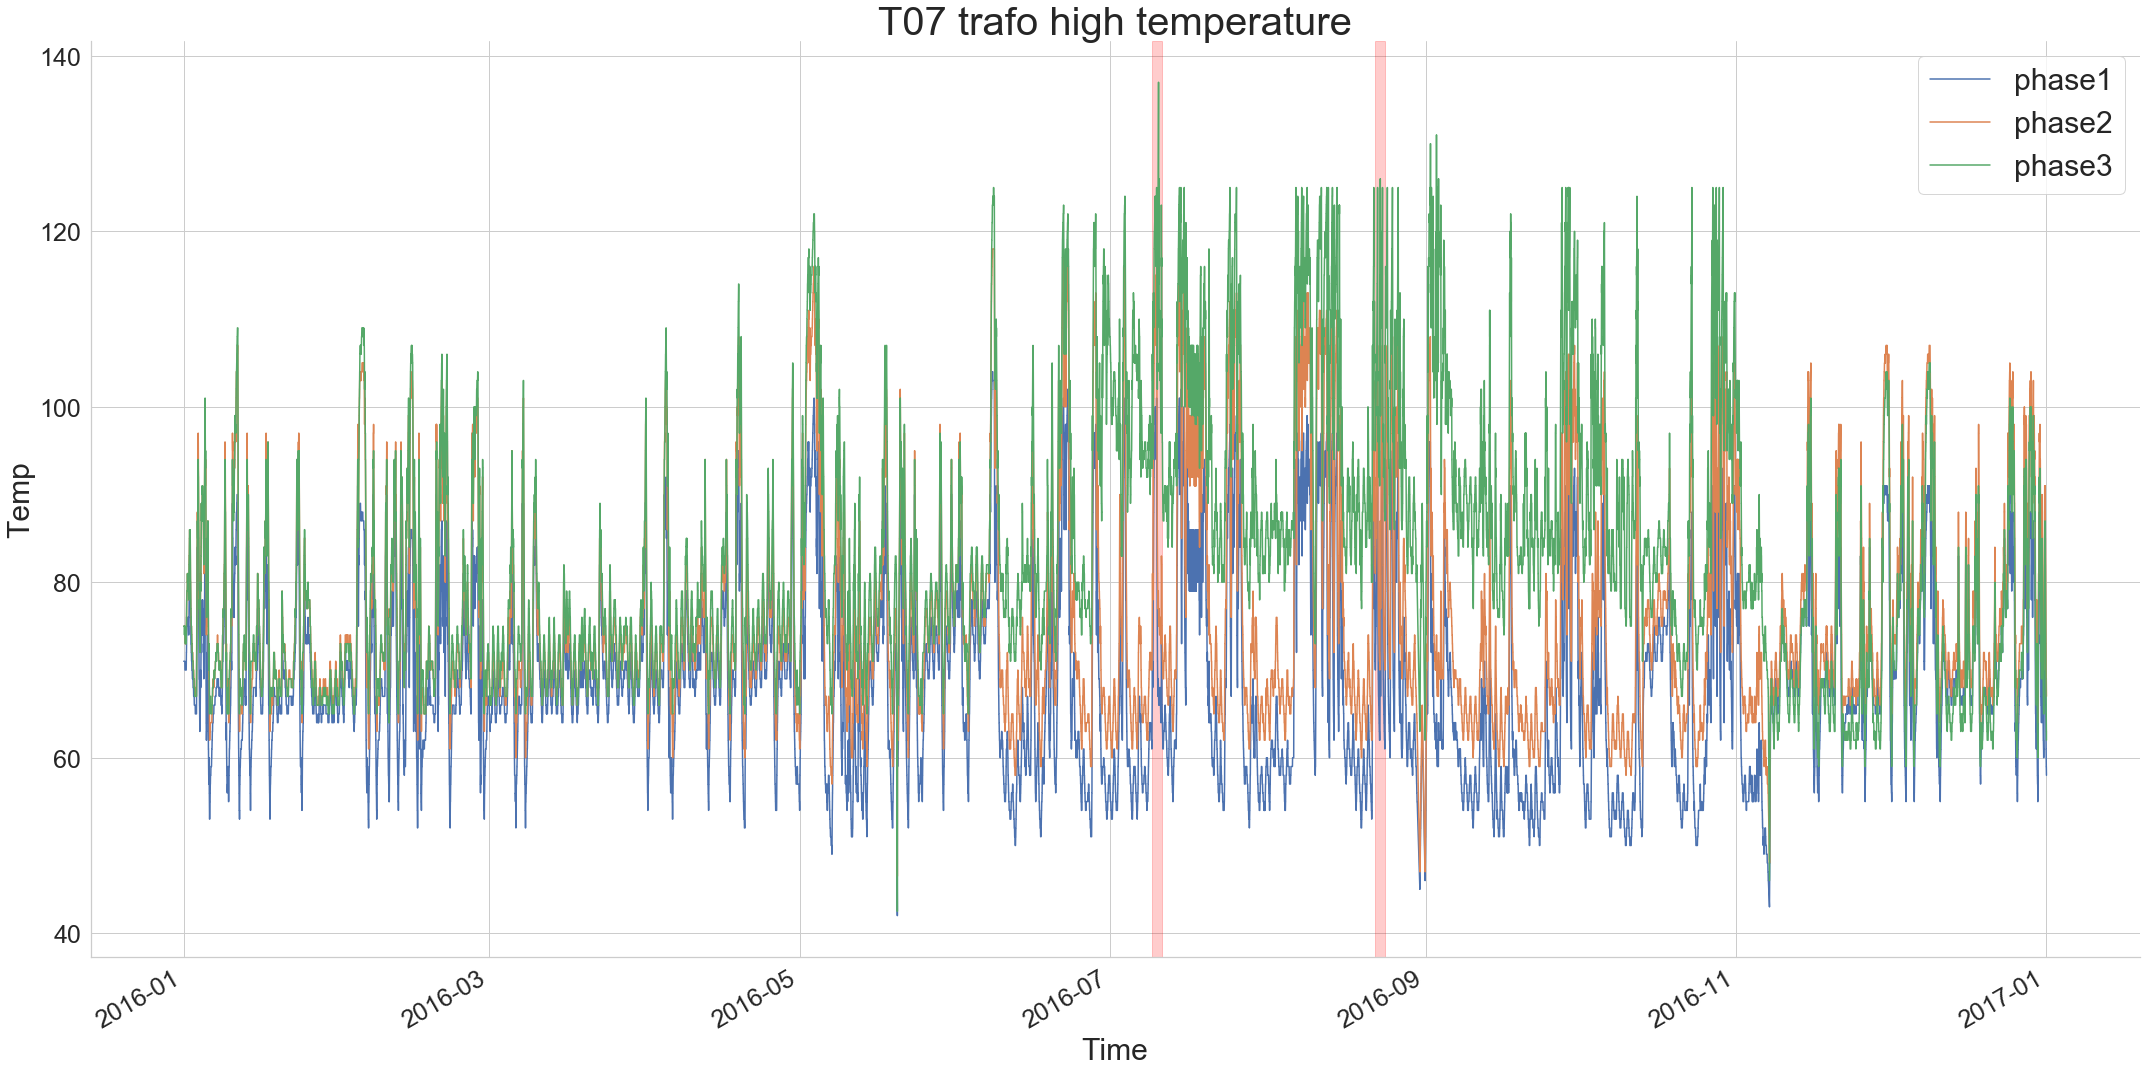

In [23]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
T07.HVTrafo_Phase1_Temp_Avg.plot(label='phase1')
T07.HVTrafo_Phase2_Temp_Avg.plot(label='phase2')
T07.HVTrafo_Phase3_Temp_Avg.plot(label='phase3')
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Power (W)',fontsize=30)
plt.axvspan('2016-08-22 02:21:00','2016-08-24 02:21:00', color='red', alpha=0.2)
plt.axvspan('2016-07-09 03:46:00','2016-07-11 03:46:00', color='red', alpha=0.2) #
#axis.yaxis.set_tick_params(labelsize=15)
plt.legend(prop={'size': 30})
plt.title("T07 trafo high temperature",size=40)
plt.tight_layout()
plt.ylabel("Temp")
sns.despine()

- This pattern around 03rd May gives an indictation for the future high temp event in 10th of july 

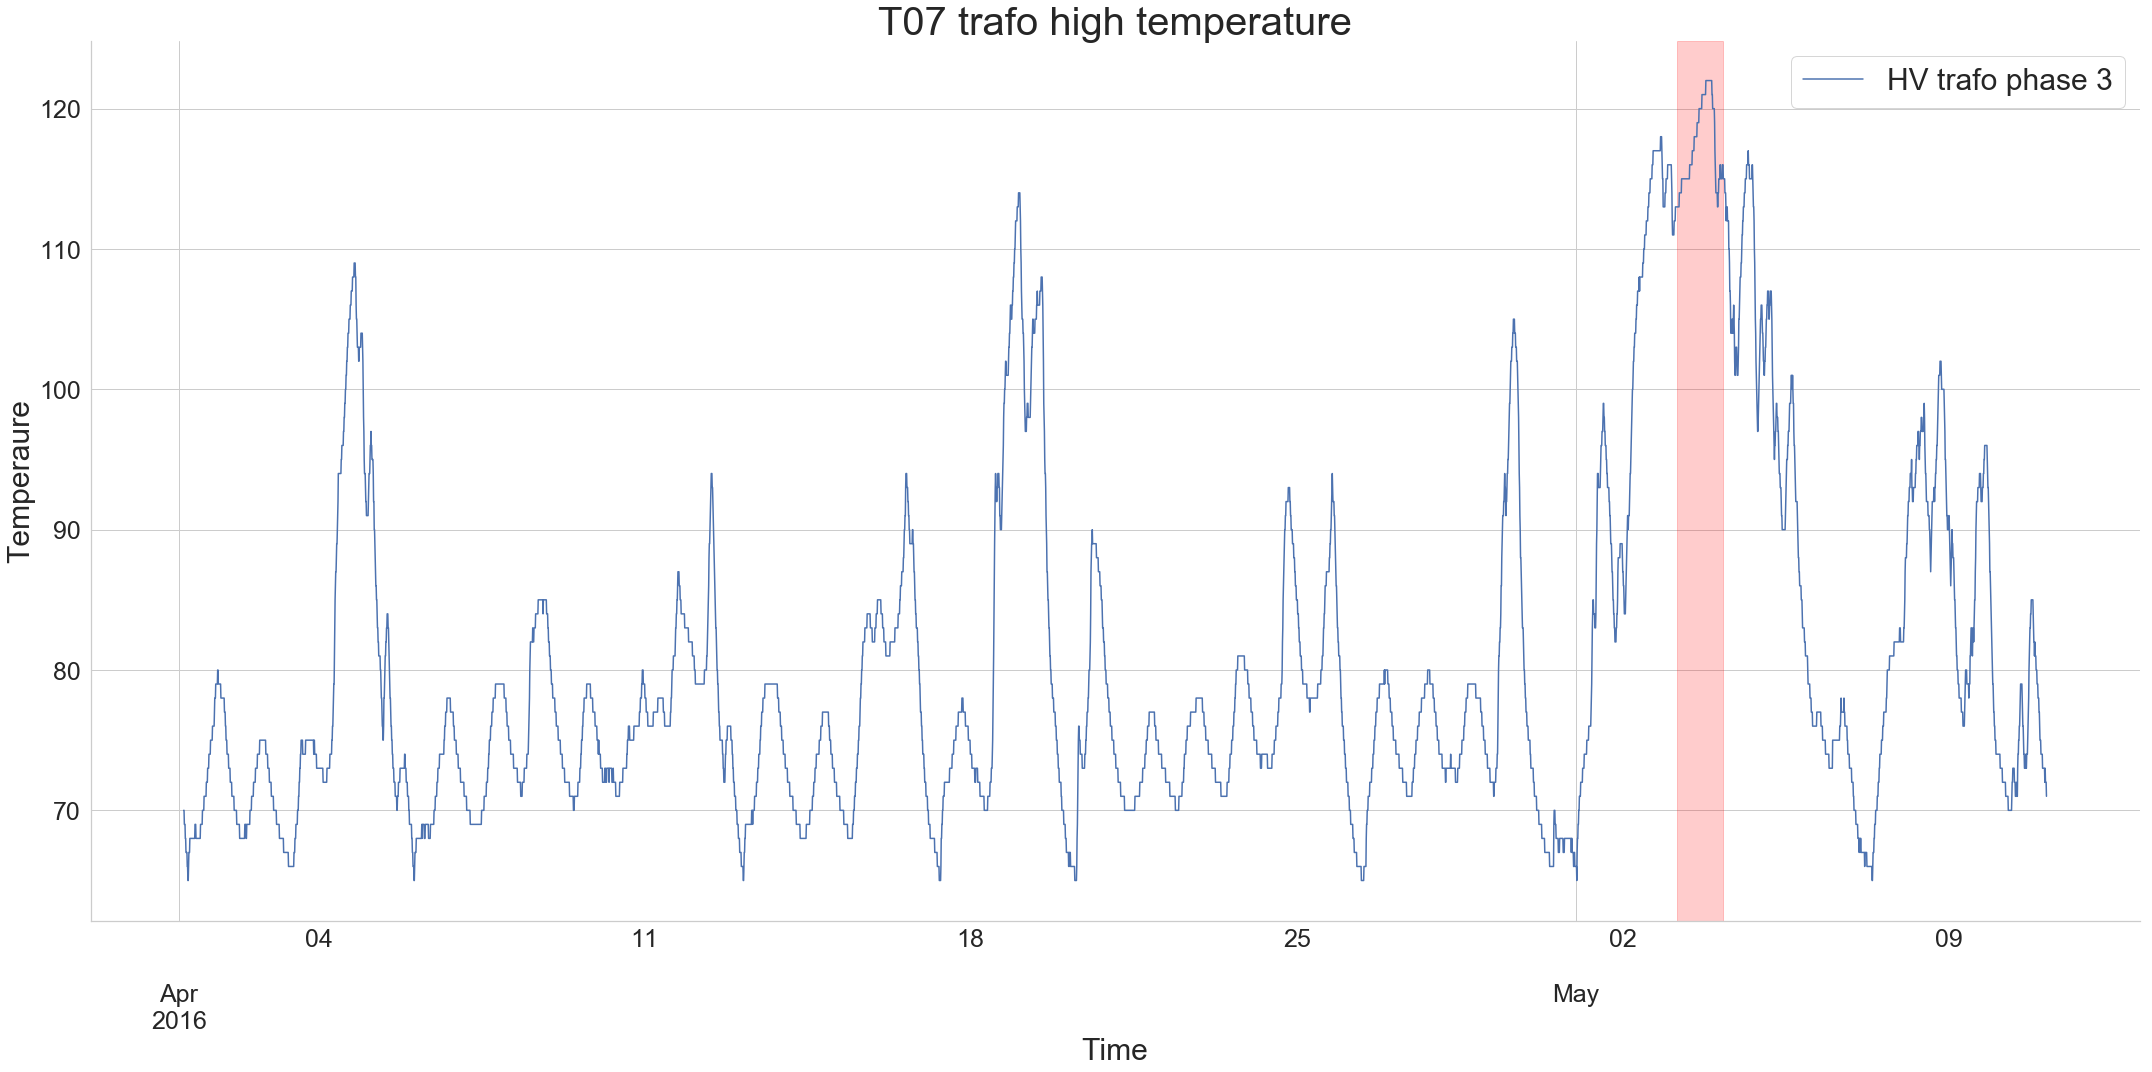

In [24]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
T07_trafoerr = giv_time(T07,'2016-04-01 02:21:00','2016-05-11 02:21:00') # Actual err on 2016-07-10 03:46:00 & 2016-08-23 02:21:00
T07_trafoerr.HVTrafo_Phase3_Temp_Avg.plot(label='HV trafo phase 3')
#T07_trafoerr.Amb_WindSpeed_Avg.plot(label='Amb wind speed')
#T07_trafoerr.HVTrafo_Phase1_Temp_Avg.plot(label='phase3')
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Temperaure',fontsize=30)
#axis.yaxis.set_tick_params(labelsize=15)
plt.axvspan('2016-05-03 03:46:00','2016-05-04 03:47:00', color='red', alpha=0.2) #
#plt.axvspan('2016-02-21 00:00:00',' 2016-02-22 00:00:00', color='red', alpha=0.2)
plt.title("T07 trafo high temperature",size=40)
plt.legend(prop={'size':30})
plt.tight_layout()
sns.despine()

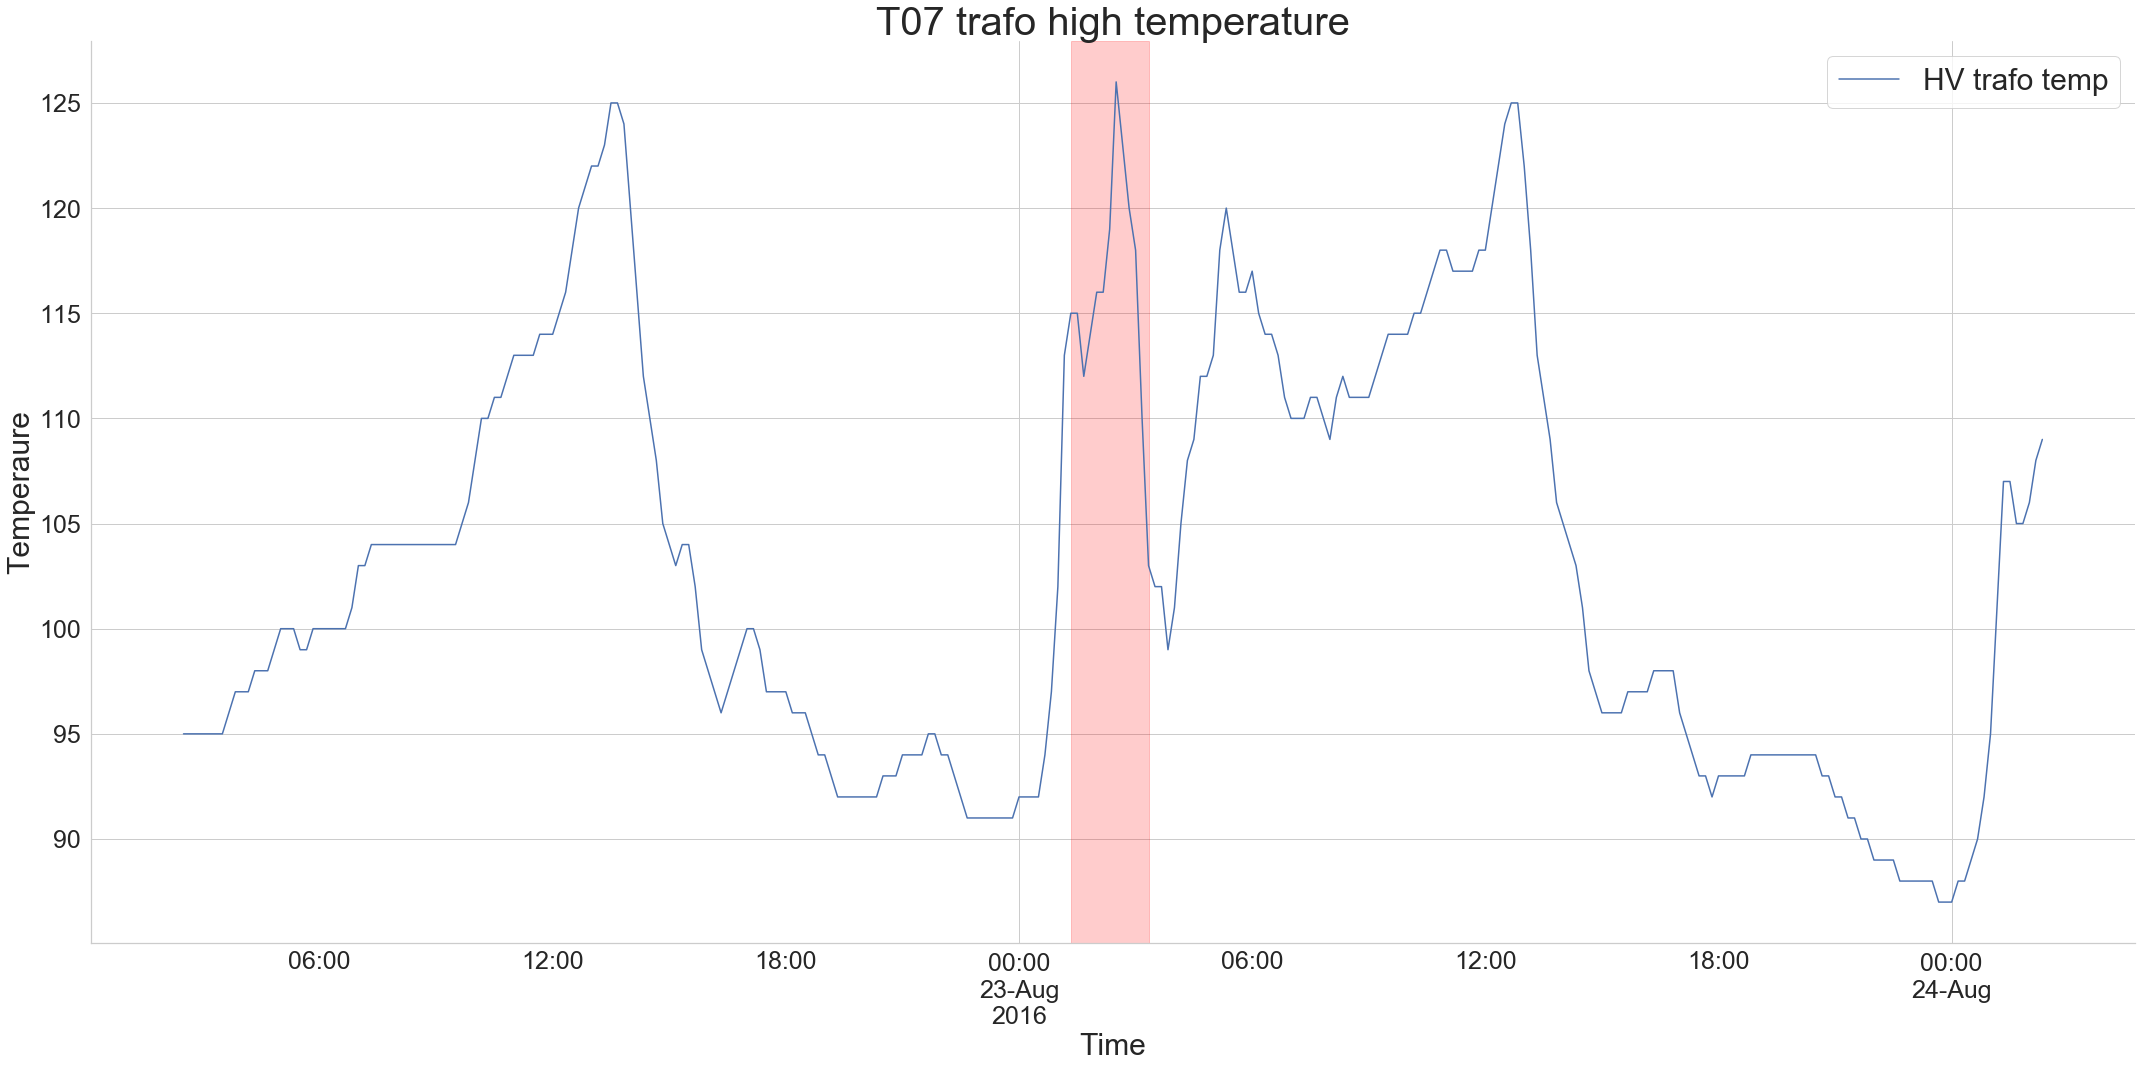

In [68]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
T07_trafoerr = giv_time(T07,'2016-08-22 02:21:00','2016-08-24 02:21:00') # Actual err on 2016-07-10 03:46:00 & 2016-08-23 02:21:00
T07_trafoerr.HVTrafo_Phase3_Temp_Avg.plot(label='HV trafo temp')
#T07_trafoerr.Gen_Phase1_Temp_Avg.plot(label='Amb wind speed')
#T07_trafoerr.HVTrafo_Phase1_Temp_Avg.plot(label='phase3')
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Temperaure',fontsize=30)
plt.axvspan('2016-08-23 01:21:00','2016-08-23 03:21:00', color='red', alpha=0.2) #
#plt.axvspan('2016-02-21 00:00:00',' 2016-02-22 00:00:00', color='red', alpha=0.2)
plt.title("T07 trafo high temperature",size=40)
plt.legend(prop={'size':30})
plt.tight_layout()
sns.despine()

In [66]:
corr_T07Traftemp_phase3 = T06.corr()['HVTrafo_Phase3_Temp_Avg'].sort_values()
corr_T07Traftemp_phase3

Prod_LatestAvg_TotReactPwr    -0.815964
Blds_PitchAngle_Avg           -0.312930
Blds_PitchAngle_Max           -0.271250
Amb_Temp_Avg                   0.420922
Gen_RPM_Max                    0.633799
Hyd_Oil_Temp_Avg               0.672027
Gen_RPM_Min                    0.686526
Nac_Temp_Avg                   0.727969
Gen_Bear2_Temp_Avg             0.756385
Gen_SlipRing_Temp_Avg          0.786572
Gen_Bear_Temp_Avg              0.802288
Gear_Oil_Temp_Avg              0.814092
Gear_Bear_Temp_Avg             0.828863
Grd_InverterPhase1_Temp_Avg    0.837729
Amb_WindSpeed_Max              0.838979
Amb_WindSpeed_Avg              0.872779
Gen_Phase2_Temp_Avg            0.877640
Gen_Phase1_Temp_Avg            0.878291
Gen_Phase3_Temp_Avg            0.885233
Grd_Busbar_Temp_Avg            0.889293
Prod_LatestAvg_TotActPwr       0.906045
Grd_Prod_Pwr_Avg               0.906084
HVTrafo_Phase1_Temp_Avg        0.996352
HVTrafo_Phase2_Temp_Avg        0.997502
HVTrafo_Phase3_Temp_Avg        1.000000


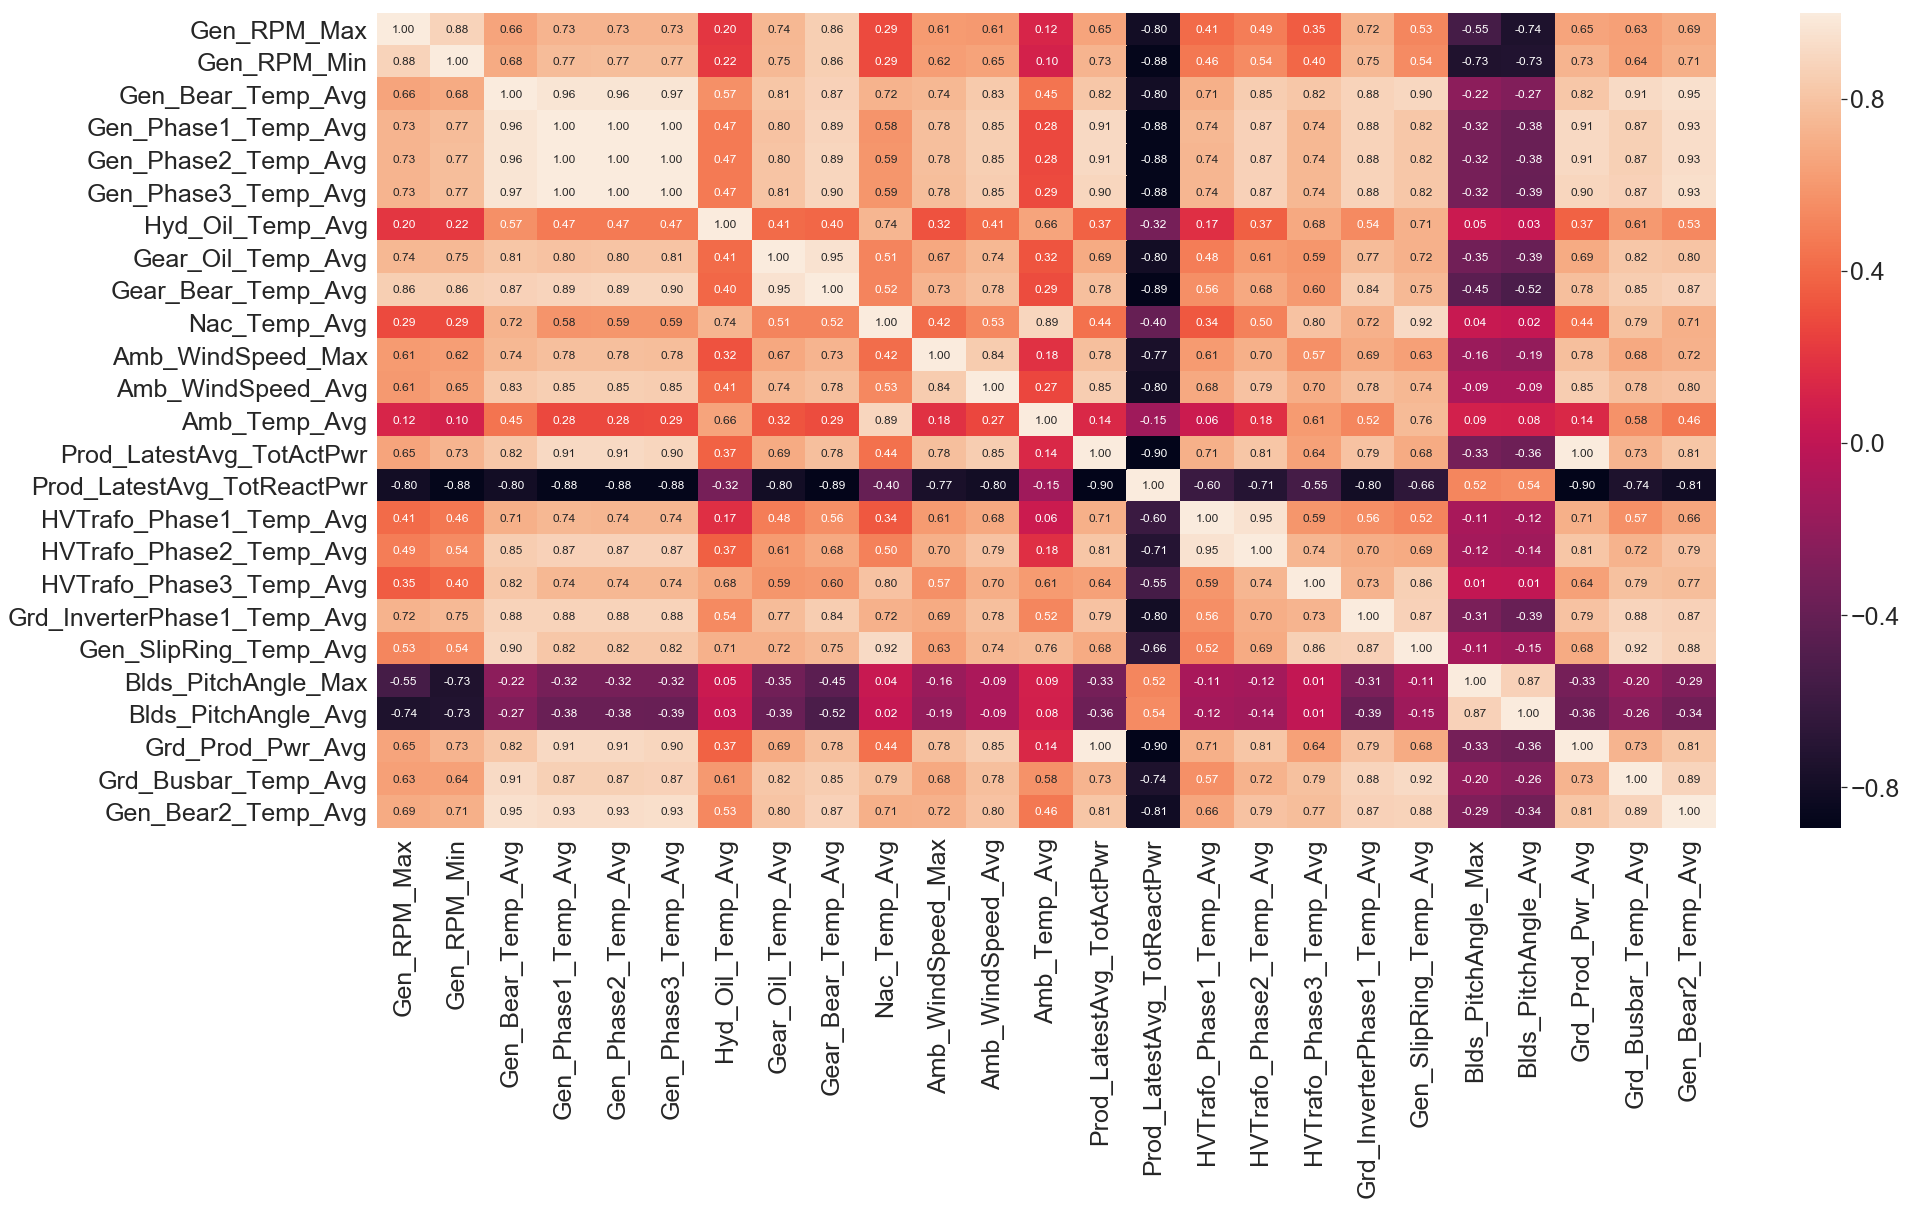

In [71]:
sns.heatmap(T07.corr(), annot=True, fmt=".2f")

# T09 analysis 

In [72]:
T09 = sli_turbine('T09',wind_signals)
T09 = T09[windsign_imppar]

In [73]:
T09_errors = sli_turbine('T09',wind_errors)
T09_errors.sort_values('Timestamp')

Turbine_ID          Component            Timestamp  \
2         T09  GENERATOR_BEARING  2016-06-07 16:59:00   
3         T09  GENERATOR_BEARING  2016-08-22 18:25:00   
15        T09            GEARBOX  2016-10-11 08:06:00   
11        T09  GENERATOR_BEARING  2016-10-17 09:19:00   

                                  Remarks  
2   High tempemperature generator bearing  
3      High temperature generator bearing  
15                       Gearbox repaired  
11            Generator bearings replaced

In [74]:
T09_bearpar = fin_par('Bear',T09.columns)
T09_pwrpar = fin_par('Pwr',T09.columns)
#T09_pwrpar
T09_bearpar

['Gen_Bear_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Gen_Bear2_Temp_Avg']

In [29]:
T09[['Gen_Bear_Temp_Avg','Gen_Bear2_Temp_Avg']].describe() 

Gen_Bear_Temp_Avg  Gen_Bear2_Temp_Avg
count       52379.000000        52379.000000
mean           52.415217           45.298268
std            19.980214           16.730820
min            18.000000           19.000000
25%            36.000000           32.000000
50%            51.000000           44.000000
75%            67.000000           55.000000
max            99.000000          205.000000

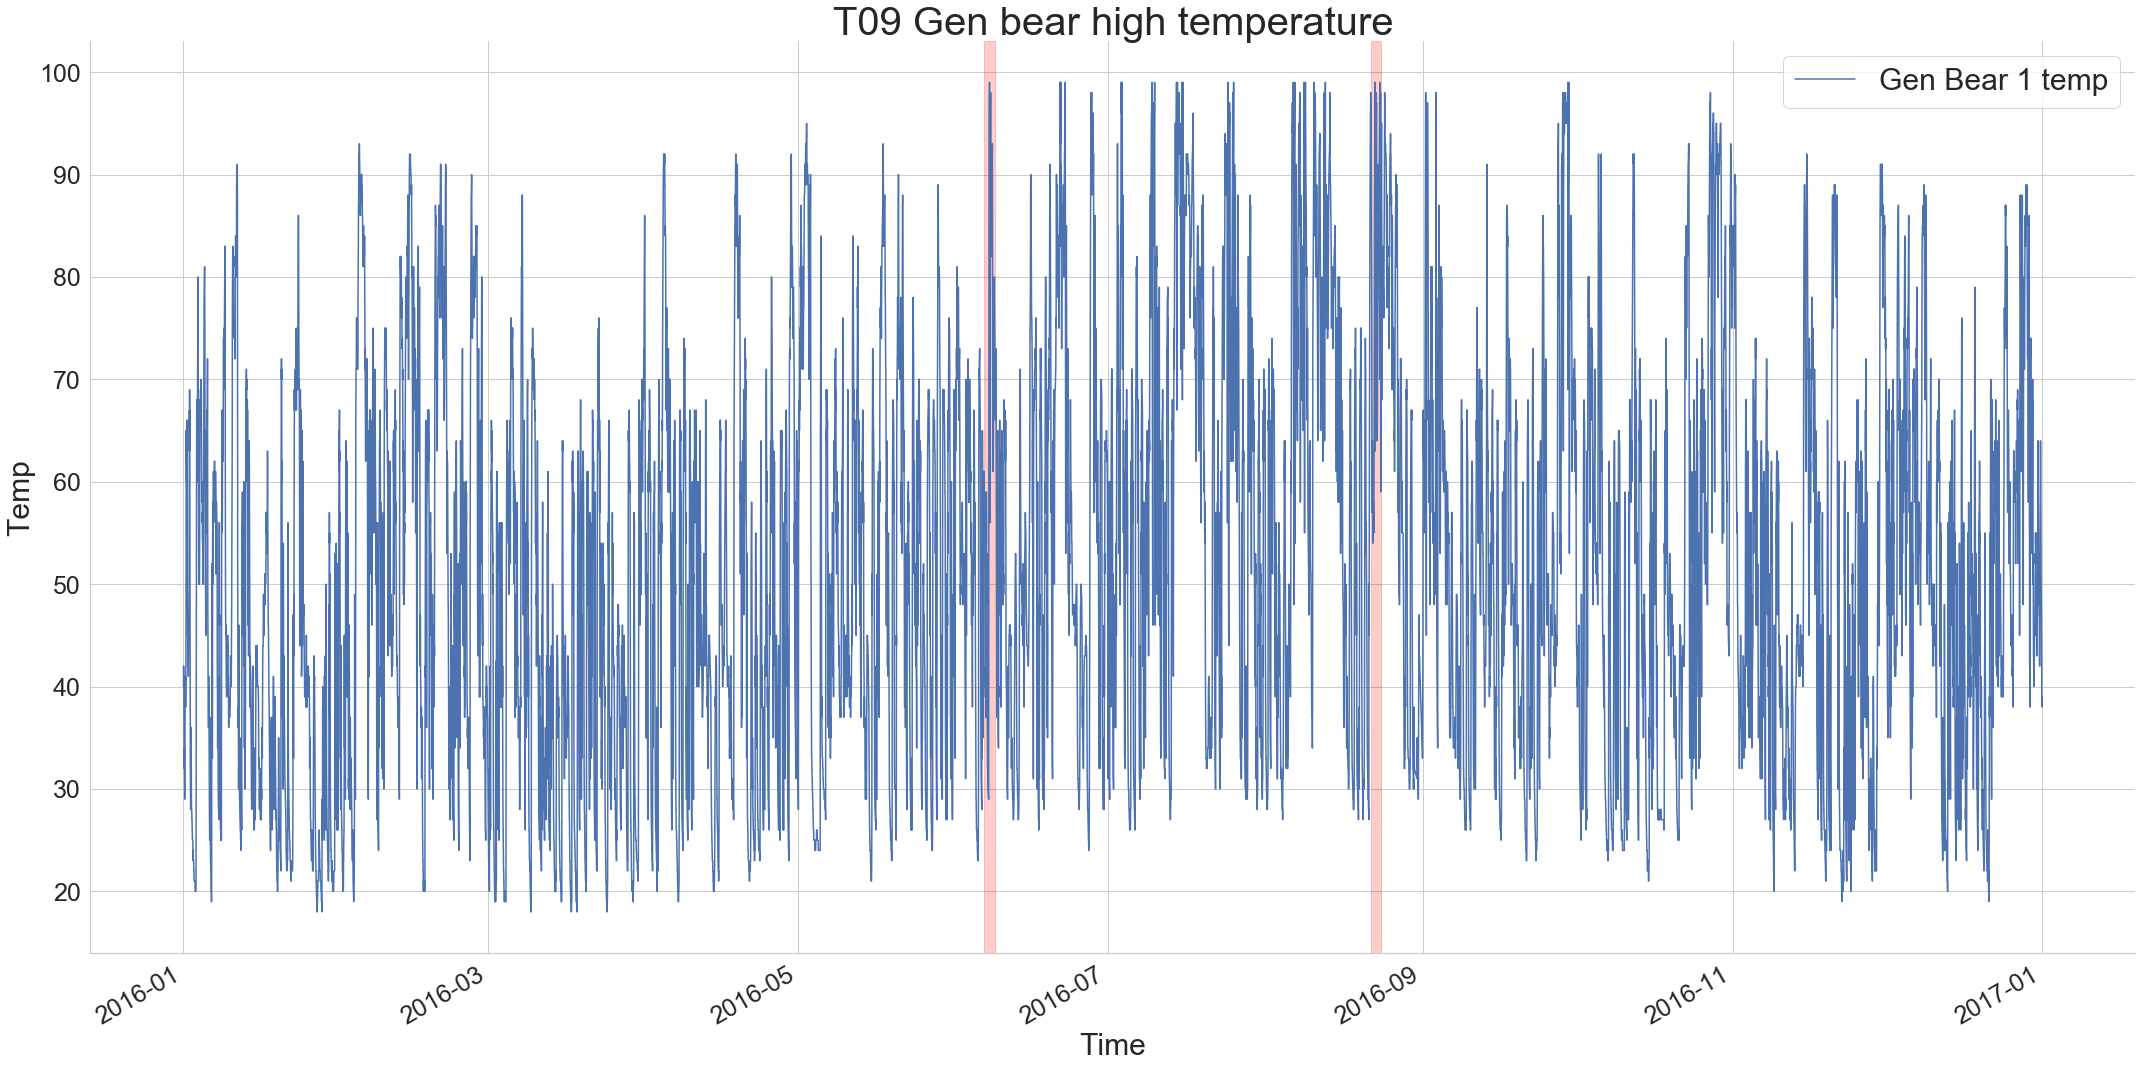

In [81]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
#T09.Grd_Prod_Pwr_Avg.plot(label='Gen 2')
T09.Gen_Bear_Temp_Avg.plot(label='Gen Bear 1 temp')
#T09.Nac_Temp_Avg.plot(label='phase3')
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Temperature (W)',fontsize=30)
plt.axvspan('2016-06-06 16:59:00','2016-06-08 16:59:00', color='red', alpha=0.2) # 2016-06-07 16:59:00
plt.axvspan('2016-08-21 18:25:00','2016-08-23 18:25:00', color='red', alpha=0.2) # 2016-08-22 18:25:00
#axis.yaxis.set_tick_params(labelsize=15)
plt.legend(prop={'size': 30})
plt.title("T09 Gen bear high temperature",size=40)
plt.tight_layout()
plt.ylabel("Temp")
sns.despine()

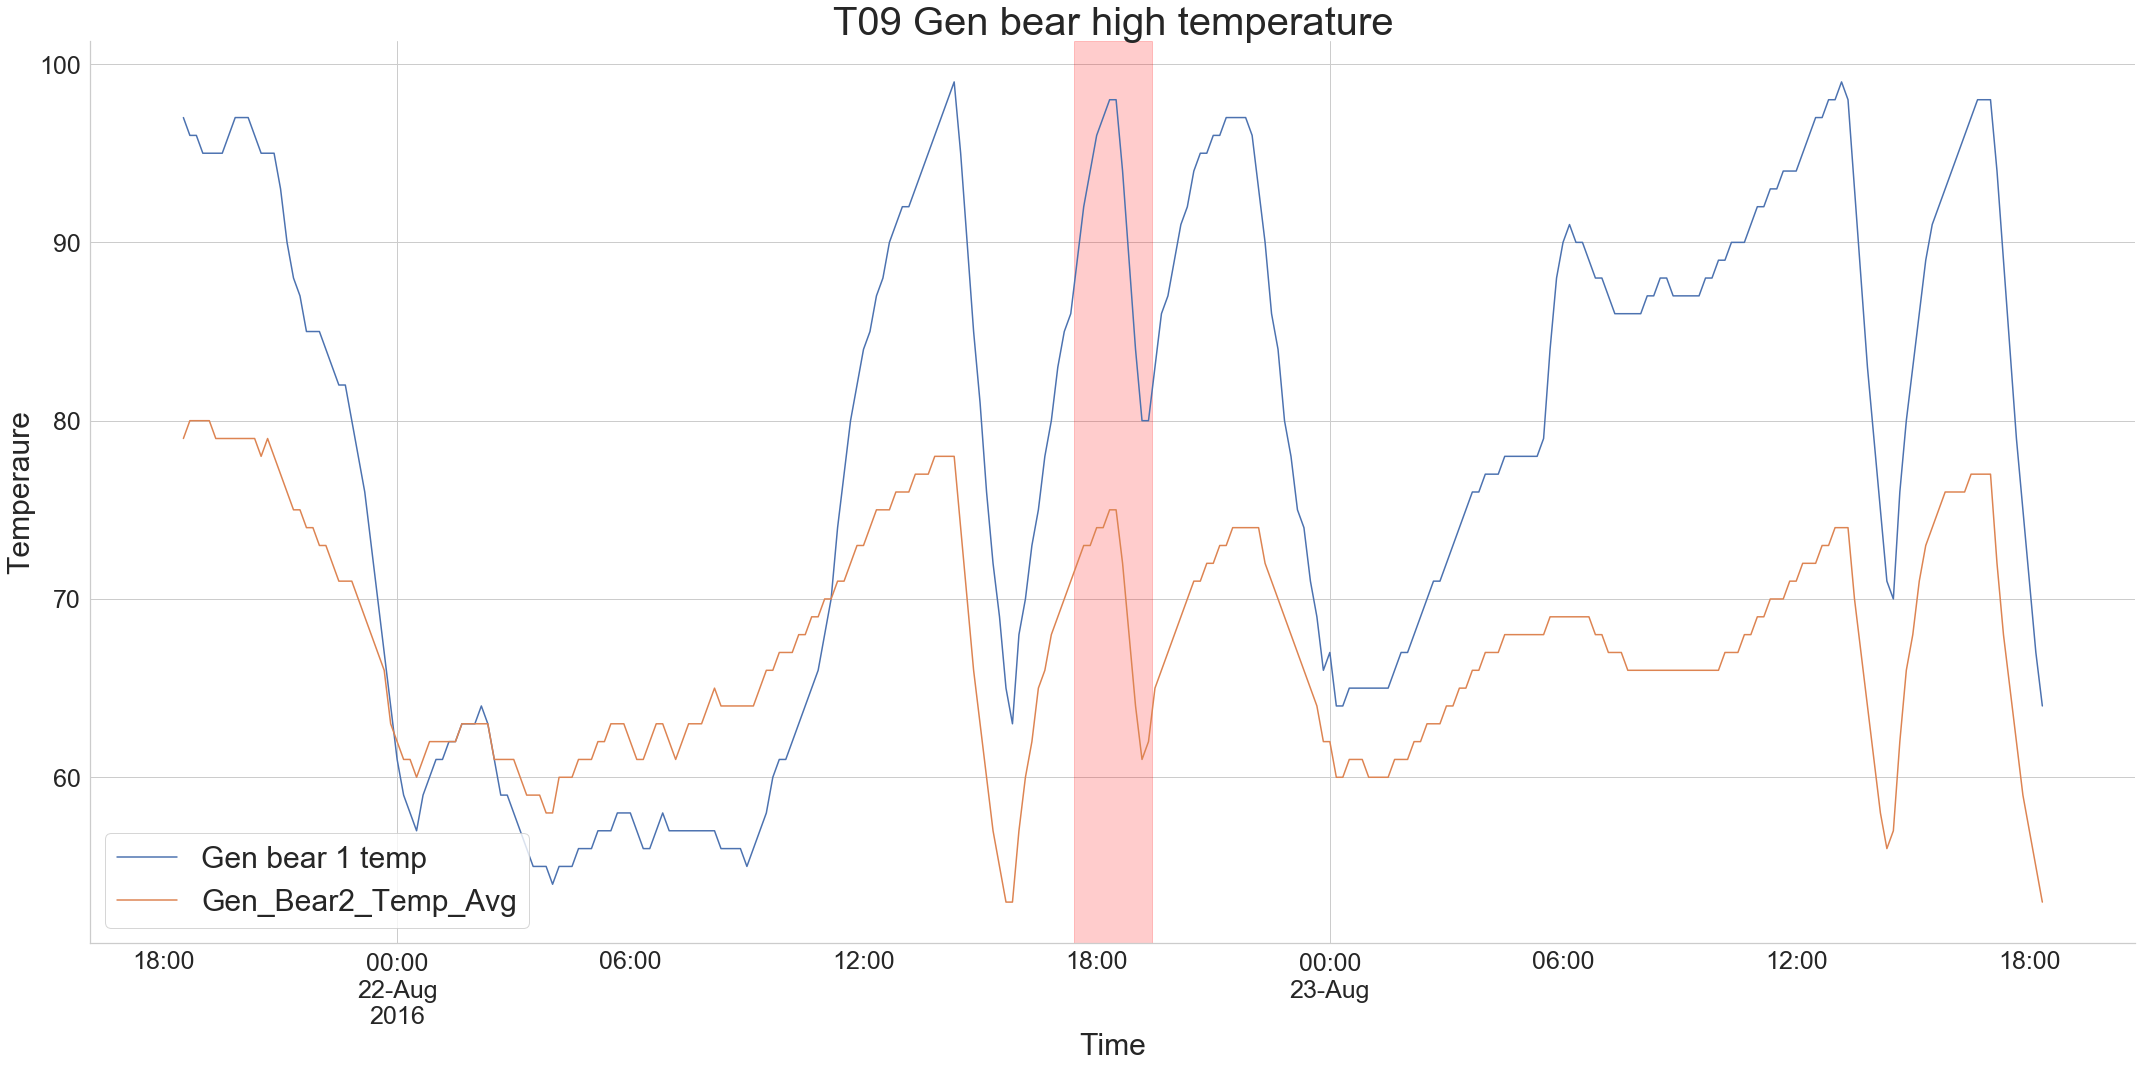

In [77]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
#T09_generr = giv_time(T09,'2016-06-06 16:59:00','2016-06-08 16:59:00') # 
T09_generr = giv_time(T09,'2016-08-21 18:25:00','2016-08-23 18:25:00')# '2016-08-21 18:25:00','2016-08-23 18:25:00'
#T09_generr.Amb_Temp_Avg.plot(label='Amb Temp')
T09_generr.Gen_Bear_Temp_Avg.plot(label='Gen bear 1 temp')
T09_generr.Gen_Bear2_Temp_Avg.plot(label='Gen_Bear2_Temp_Avg') #Gen_RPM_Avg
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Temperaure',fontsize=30)
#plt.axvspan('2016-06-07 15:59:00','2016-06-07 17:59:00', color='red', alpha=0.2) #
plt.axvspan('2016-08-22 17:25:00','2016-08-22 19:25:00', color='red', alpha=0.2)
plt.title("T09 Gen bear high temperature",size=40)
plt.legend(prop={'size':30})
plt.tight_layout()
sns.despine()

In [78]:
correlations_data = T09.corr()['Gen_Bear_Temp_Avg'].sort_values()
correlations_data

Prod_LatestAvg_TotReactPwr    -0.836569
Blds_PitchAngle_Avg           -0.467263
Blds_PitchAngle_Max           -0.374046
Hyd_Oil_Temp_Avg               0.132535
Amb_Temp_Avg                   0.358894
HVTrafo_Phase1_Temp_Avg        0.652019
Nac_Temp_Avg                   0.665082
Gen_RPM_Max                    0.746261
Gen_RPM_Min                    0.758219
Gen_Bear2_Temp_Avg             0.760482
HVTrafo_Phase2_Temp_Avg        0.765928
HVTrafo_Phase3_Temp_Avg        0.773129
Amb_WindSpeed_Max              0.775286
Grd_Prod_Pwr_Avg               0.794651
Prod_LatestAvg_TotActPwr       0.794765
Gen_SlipRing_Temp_Avg          0.812750
Amb_WindSpeed_Avg              0.831606
Grd_InverterPhase1_Temp_Avg    0.833355
Gear_Oil_Temp_Avg              0.840853
Grd_Busbar_Temp_Avg            0.866041
Gear_Bear_Temp_Avg             0.897672
Gen_Phase1_Temp_Avg            0.917158
Gen_Phase2_Temp_Avg            0.921844
Gen_Phase3_Temp_Avg            0.921904
Gen_Bear_Temp_Avg              1.000000


In [79]:
T11 = sli_turbine('T11',wind_signals)
T11 = T11[windsign_imppar]

In [80]:
T11_errors = sli_turbine('T11',wind_errors)
T11_errors.sort_values('Timestamp')

Turbine_ID        Component            Timestamp  \
4         T11        GENERATOR  2016-03-03 19:00:00   
12        T11  HYDRAULIC_GROUP  2016-10-17 17:44:00   

                                       Remarks  
4          Electric circuit error in generator  
12  Hydraulic group error in the brake circuit

- There is a clear rise in the average temperature of Hyd that is leading to errorr

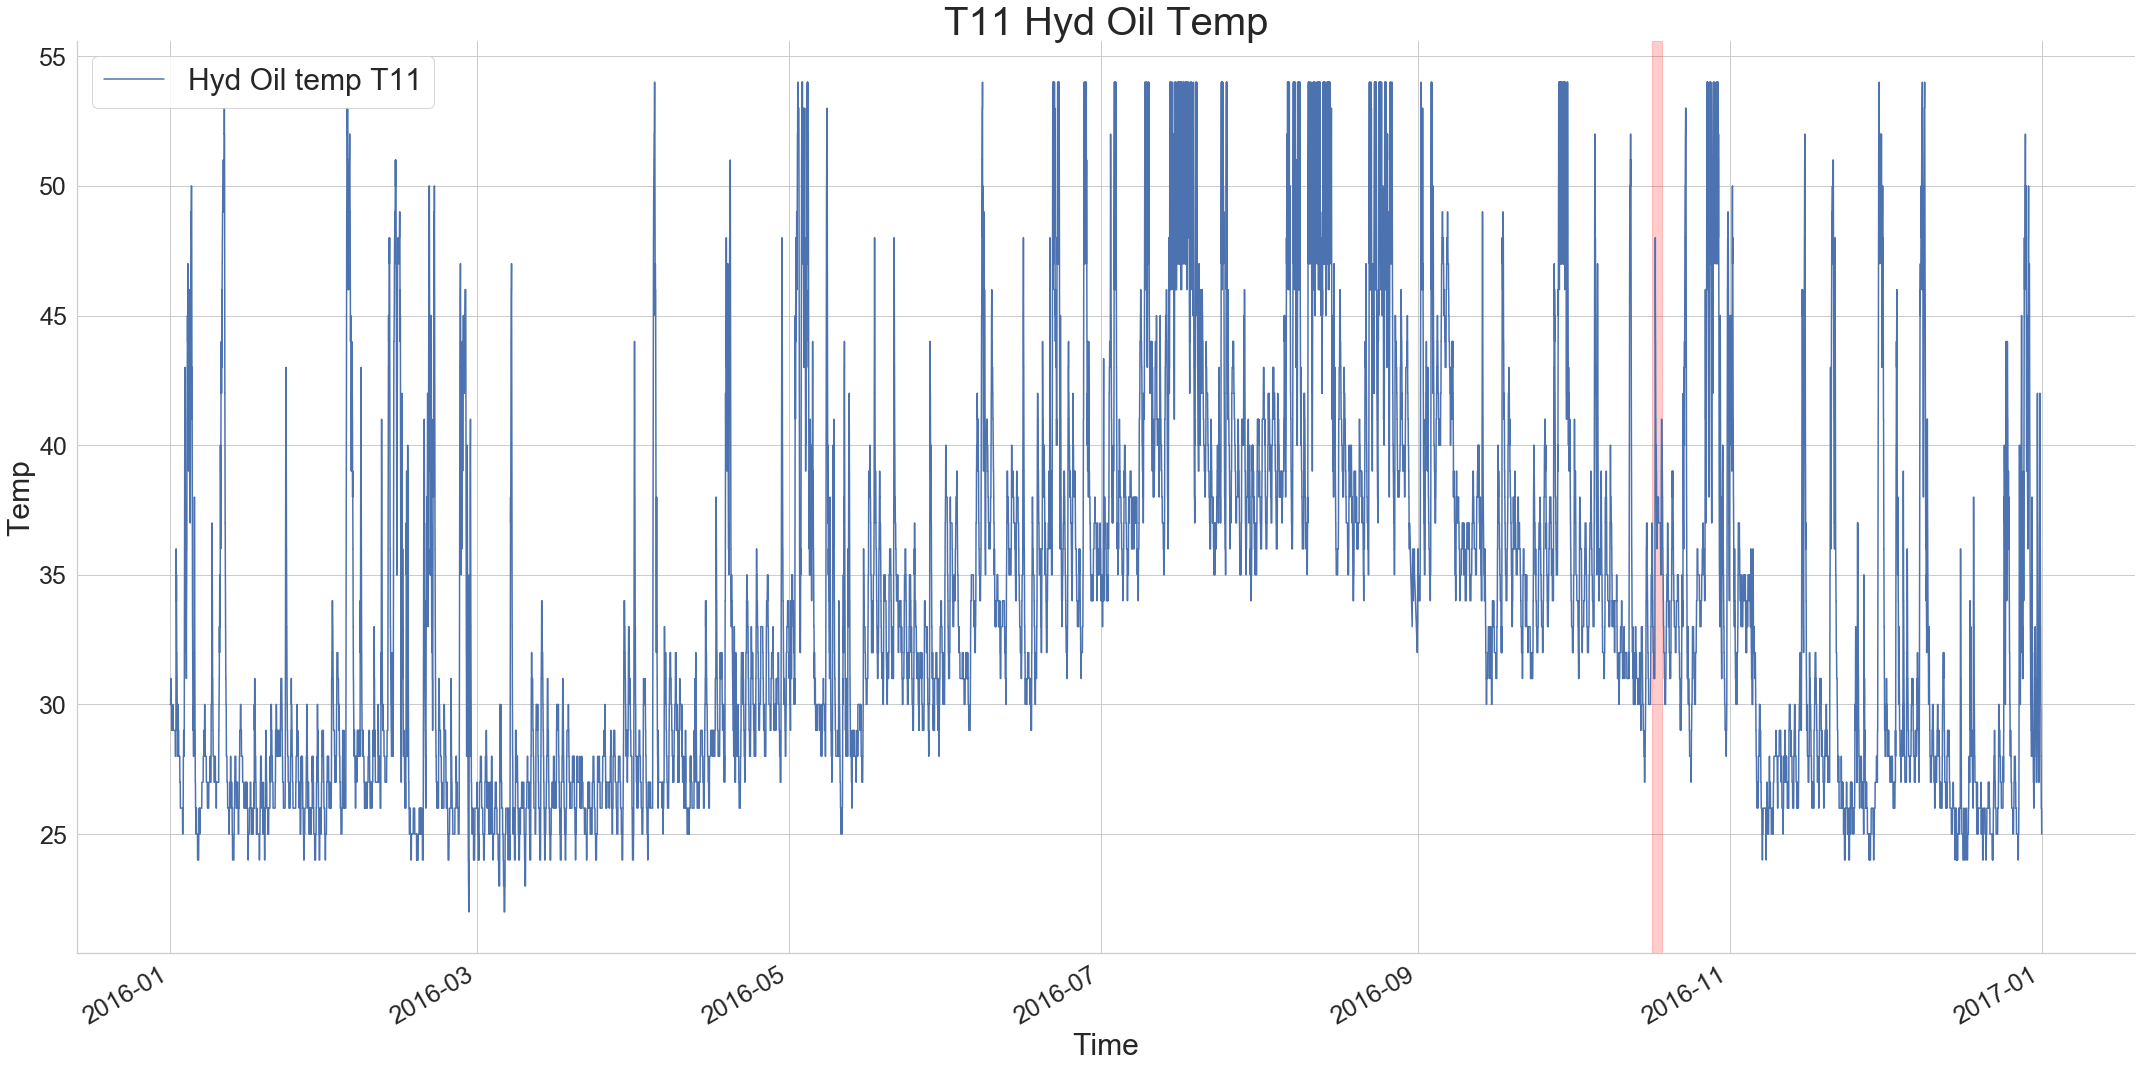

In [89]:
plt.rcParams['figure.figsize'] =(30,15)
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, axis = plt.subplots()
#T09.Grd_Prod_Pwr_Avg.plot(label='Gen 2')
T11.Hyd_Oil_Temp_Avg.plot(label='Hyd Oil temp T11')
#T11.Blds_PitchAngle_Avg.plot(label='Hyd Oil temp T09')
axis.set_xlabel('Time',fontsize=30)
axis.set_ylabel('Temperature (W)',fontsize=30)
plt.axvspan('2016-10-16 17:44:00','2016-10-18 17:44:00', color='red', alpha=0.2) # 2016-10-17 17:44:00
#plt.axvspan('2016-08-21 18:25:00','2016-08-23 18:25:00', color='red', alpha=0.2) # 2016-08-22 18:25:00
#axis.yaxis.set_tick_params(labelsize=15)
plt.legend(prop={'size': 30})
plt.title("T11 Hyd Oil Temp",size=40)
plt.tight_layout()
plt.ylabel("Temp")
sns.despine()

In [ ]:
['Blds_PitchAngle_Min',
 'Blds_PitchAngle_Max',
 'Blds_PitchAngle_Avg',
 'Blds_PitchAngle_Std']